In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.plotly as py
import plotly 

# PCA and K-Means Clustering 


# Visualizing Higher Dimensional Data

- ref: https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

# Among the many large populations of things, there are populations that hide smaller populations from within.

# We have a large table of data that contains ~8000 rows and ~150 columns ( we call these factors )

#  So, lets ask the question: what smaller populations are hiding within our set of data?

- ## To answer this question, we will use a method in data science that is called k-means clustering
- ## From a quick google images search we see many cases of k-means clustering used to color groups inside data with just 2 factors.

- ## Check out how it can look in the scatter plot below:

![https://i.stack.imgur.com/U76bN.png](img/k-means_scatter.png)
ref: https://i.stack.imgur.com/U76bN.png

- ## In this plot, we can see that two columns of data were hiding 4 different groups!

# So... how exactly can we find groups in our ~150 factors using this method?

- ## Well... we can find which are the most important factors and then find the groups within those, while ignoring the rest! 

- ## This is called dimensionality reduction and we will do this using a variety of methods!


# Before moving on, lets remind ourselves what exactly our final result will look like.
- ## At the end of this analysis, we will have a single column that will label each row with one of k different colors.
- ## Now lets get started.

# Import the data

In [265]:
skills = []
# The list of skills in the columns of the data table
skills = list(pd.read_csv('../monster_scraper/skill_lists/data_scientist.txt'))
# Sometimes there are extra skills that have not been included in the dataset
skills = [x for x in skills if x not in ['pydoop', 'dumbo', 'api', 'hadoopy', 'mrjob']]
data = []
# The data table
file = 'scraped_data_data-scientist_4-24-2019.txt'
data = pd.read_csv('../monster_scraper/scraped_data/'+file)

# Limit the data to skill columns

In [3]:
# Get just the columns of data with the skills
data_just_skills = []
data_just_skills = data[skills]

# Remove the insignificant data

In [4]:
# Remove and skills columns that are mostly empty (mean values equal zero up to 2 decimal places)
data_just_nonzero_prob_skills = []
data_just_nonzero_prob_skills = data_just_skills.T[pd.DataFrame(np.round(data_just_skills.mean(),decimals=2) != 0)[0].values].T

In [5]:
print( 'number of skills: '+str(len(skills)))
print( 'number of non-zero probability skills: '+str(len(data_just_nonzero_prob_skills.columns)))
data_just_nonzero_prob_skills.head(5)

number of skills: 127
number of non-zero probability skills: 43


r  python  java  c++  c#  c  ruby  perl  sas  spss  ...  kafka  hdfs  \
0  1       1     1    0   0  0     1     0    1     1  ...      0     0   
1  0       0     0    0   0  0     0     0    0     0  ...      0     0   
2  0       0     0    0   0  0     0     0    0     0  ...      0     0   
3  0       1     0    0   0  0     1     0    0     0  ...      0     0   
4  0       0     0    0   0  0     0     0    1     0  ...      0     0   

   alteryx  unix  weka  teradata  stata  jupyter  amazon  azure  
0        0     0     0         1      1        0       0      0  
1        0     0     0         0      0        0       0      0  
2        0     0     0         0      0        0       0      0  
3        0     0     0         0      0        0       0      0  
4        0     0     0         0      0        0       0      0  

[5 rows x 43 columns]

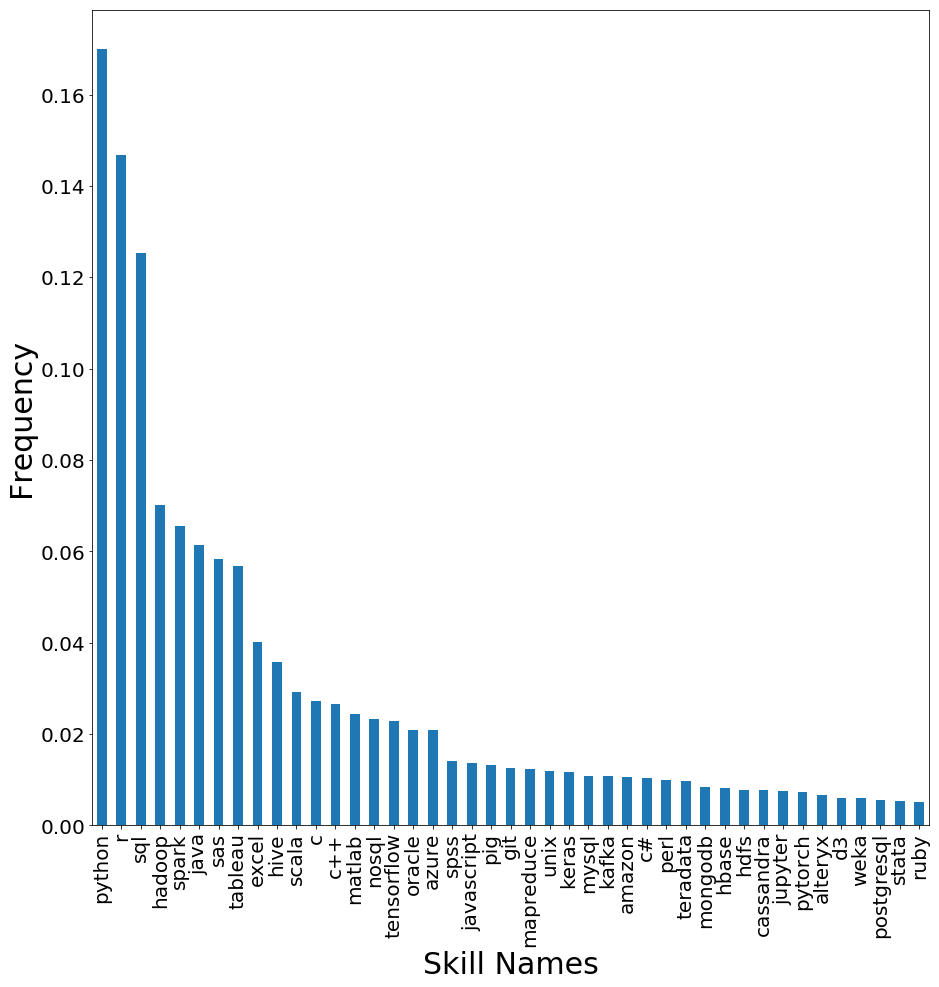

In [6]:
# View the data
plt.figure(figsize=(15,15))
plt.ylabel('Frequency',fontsize=30)
plt.xlabel('Skill Names',fontsize=30)
data_just_nonzero_prob_skills.mean().sort_values(ascending=False).plot(kind='bar',fontsize=20)
plt.show()

# Bin the data for a metric
**Why do we need bins?** We need to group the observations into groups so that we can calculate the value of a metric for each group
- ## Sturges Rule:
## $k = 1 + 3.322*log2(n)$
## $ k : number\ of\ bins $
## $ n : number\ of\ observations\ per\ bin$

In [7]:
n = len(data_just_nonzero_prob_skills)

# Get the bin size
##k = int((1 + 3.322*np.log2(n))) 

# Get the square root of the bins
k = int(np.sqrt(n))

In [8]:
k

98

In [9]:
import random

In [10]:
# Make a column of bin labels for grouping the bins into averages
bin_labels = [int(np.floor(index/k + 1)) for index in np.arange(1,n+1)]

# Randomize the ordering of the bin labels
randomized_index = [random.uniform(0,1) for x in range(len(bin_labels))]

# Insert data into dataframe
df_randomize = []
df_randomize = pd.DataFrame(data = np.array([bin_labels,randomized_index]).T,columns=['bin_labels','randomized_index'])
df_randomized = []
df_randomized = df_randomize.sort_values(by='randomized_index')
df_randomized.sort_values(by='randomized_index').head(5)

bin_labels  randomized_index
1538        16.0          0.000133
7944        82.0          0.000426
9017        93.0          0.000705
722          8.0          0.000821
9461        97.0          0.001000

In [11]:
# Export the randomized bin labels as a list
randomized_bin_labels = df_randomized['bin_labels']
randomized_bin_labels = [int(x) for x in randomized_bin_labels.values]
randomized_bin_labels[0:5]

[16, 82, 93, 8, 97]

In [12]:
# Add the bin_label column to the dataframe
data_just_nonzero_prob_skills['randomized_bin_labels'] = randomized_bin_labels

# Calculate the metric for each bin (the sample average)

In [13]:
data_just_nonzero_prob_skills_metric = np.round(data_just_nonzero_prob_skills.groupby('randomized_bin_labels').mean(),decimals=3)
data_just_nonzero_prob_skills_metric.head(5)

r  python   java    c++    c#      c  ruby   perl  \
randomized_bin_labels                                                          
1                      0.206   0.206  0.082  0.041  0.01  0.031  0.01  0.021   
2                      0.133   0.163  0.051  0.020  0.00  0.000  0.01  0.020   
3                      0.112   0.143  0.031  0.010  0.01  0.041  0.01  0.020   
4                      0.133   0.153  0.071  0.051  0.01  0.031  0.00  0.010   
5                      0.133   0.173  0.041  0.031  0.01  0.020  0.00  0.020   

                         sas  spss  ...  kafka  hdfs  alteryx   unix   weka  \
randomized_bin_labels               ...                                       
1                      0.072  0.01  ...  0.041  0.01     0.01  0.010  0.021   
2                      0.051  0.00  ...  0.020  0.00     0.01  0.031  0.000   
3                      0.061  0.01  ...  0.000  0.00     0.00  0.010  0.010   
4                      0.051  0.00  ...  0.000  0.00     0.00  0.000  0.020   
5                      0.031  0.00  ...  0.000  0.00     0.01  0.010  0.000   

                       teradata  stata  jupyter  amazon  azure  
randomized_bin_labels                                           
1                         0.031   0.01    0.021    0.01  0.031  
2                         0.020   0.00    0.000    0.01  0.061  
3                         0.020   0.01    0.000    0.01  0.010  
4                         0.000   0.00    0.000    0.00  0.031  
5                         0.010   0.00    0.000    0.00  0.020  

[5 rows x 43 columns]

In [321]:
# Let us get the list of skills
important_skills = []
important_skills = data_just_nonzero_prob_skills_metric.columns
non_zero_skills = data_just_nonzero_prob_skills_metric.columns

# Scale the data
- ## Standardize the data to have an average value of zero and a variance of 1 using the formula:

# $$x' = \frac{x-mean(x)}{std(x)}$$

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar = StandardScaler()

# Fit the data
scalar.fit(data_just_nonzero_prob_skills_metric)

# Transform the data
standardized_data_just_nonzero_prob_skills_metric = []
standardized_data_just_nonzero_prob_skills_metric = scalar.transform(data_just_nonzero_prob_skills_metric)
standardized_data_just_nonzero_prob_skills_metric = pd.DataFrame(data = standardized_data_just_nonzero_prob_skills_metric,columns = important_skills)
standardized_data_just_nonzero_prob_skills_metric.head(3)

r    python      java       c++        c#         c      ruby  \
0  1.460517  0.961205  0.917376  0.982233 -0.007126  0.249800  0.724166   
1 -0.325163 -0.166959 -0.421391 -0.426086 -1.014970 -1.657256  0.724166   
2 -0.838852 -0.691686 -1.285111 -1.096714 -0.007126  0.864979  0.724166   

       perl       sas      spss  ...     kafka      hdfs   alteryx      unix  \
0  1.079341  0.593466 -0.307718  ...  2.742275  0.246090  0.376526 -0.137727   
1  0.979663 -0.287831 -1.122267  ...  0.818148 -0.795059  0.376526  1.608216   
2  0.979663  0.131834 -0.307718  ... -1.014355 -0.795059 -0.732882 -0.137727   

       weka  teradata     stata   jupyter    amazon     azure  
0  1.962795  2.522767  0.755929  1.547001 -0.039239  0.789695  
1 -0.746801  1.237183 -0.803175 -0.826590 -0.039239  3.053590  
2  0.543483  1.237183  0.755929 -0.826590 -0.039239 -0.795031  

[3 rows x 43 columns]

# Look at some of the scatterplots

In [25]:
standardized_data_just_nonzero_prob_skills_metric[important_skills[0:19]].corr()

r    python      java       c++        c#         c  \
r           1.000000  0.770693  0.486209  0.368455  0.223206  0.369861   
python      0.770693  1.000000  0.553540  0.425092  0.255475  0.328456   
java        0.486209  0.553540  1.000000  0.462651  0.287638  0.288226   
c++         0.368455  0.425092  0.462651  1.000000  0.444673  0.458872   
c#          0.223206  0.255475  0.287638  0.444673  1.000000  0.282615   
c           0.369861  0.328456  0.288226  0.458872  0.282615  1.000000   
ruby        0.113560  0.102565  0.153891 -0.028848  0.141201 -0.013642   
perl        0.063854  0.172235  0.144909  0.105188  0.194814  0.161925   
sas         0.519600  0.453909  0.364913  0.200419  0.158127  0.213417   
spss        0.296103  0.291255  0.243382  0.001746 -0.046727  0.066687   
matlab      0.527399  0.436195  0.352166  0.338622  0.238557  0.409489   
javascript  0.242239  0.083908  0.258613  0.017645  0.062307  0.070667   
scala       0.436916  0.501826  0.395917  0.337360  0.191186  0.272606   
excel       0.302857  0.194398  0.080718 -0.095361  0.046754  0.187218   
tableau     0.530529  0.632522  0.418617  0.402537  0.221403  0.285515   
d3          0.062342  0.045644  0.123135  0.059540  0.038747 -0.023671   
hadoop      0.404007  0.584340  0.531080  0.171573  0.228773  0.175346   
mapreduce   0.145863  0.260104  0.394569  0.074118  0.108753  0.014056   
spark       0.434586  0.592634  0.383183  0.222634  0.005906  0.126753   

                ruby      perl       sas      spss    matlab  javascript  \
r           0.113560  0.063854  0.519600  0.296103  0.527399    0.242239   
python      0.102565  0.172235  0.453909  0.291255  0.436195    0.083908   
java        0.153891  0.144909  0.364913  0.243382  0.352166    0.258613   
c++        -0.028848  0.105188  0.200419  0.001746  0.338622    0.017645   
c#          0.141201  0.194814  0.158127 -0.046727  0.238557    0.062307   
c          -0.013642  0.161925  0.213417  0.066687  0.409489    0.070667   
ruby        1.000000  0.040086  0.055742  0.038714  0.129307    0.140795   
perl        0.040086  1.000000 -0.022035 -0.095178  0.041162   -0.008140   
sas         0.055742 -0.022035  1.000000  0.428290  0.315956    0.165086   
spss        0.038714 -0.095178  0.428290  1.000000  0.162222    0.069705   
matlab      0.129307  0.041162  0.315956  0.162222  1.000000    0.293255   
javascript  0.140795 -0.008140  0.165086  0.069705  0.293255    1.000000   
scala       0.208094  0.090538  0.049639  0.160036  0.211258    0.213805   
excel       0.170554  0.242539  0.265107 -0.021392  0.308208    0.193843   
tableau     0.147862  0.012207  0.346515  0.219814  0.344948    0.263739   
d3          0.094163  0.171927 -0.016749  0.044258 -0.077297    0.197235   
hadoop      0.176868  0.123619  0.281135  0.133086  0.241765    0.251031   
mapreduce   0.146779  0.031518  0.039822  0.131894  0.053560    0.142339   
spark       0.108119 -0.000668  0.182971  0.215893  0.177345    0.278404   

               scala     excel   tableau        d3    hadoop  mapreduce  \
r           0.436916  0.302857  0.530529  0.062342  0.404007   0.145863   
python      0.501826  0.194398  0.632522  0.045644  0.584340   0.260104   
java        0.395917  0.080718  0.418617  0.123135  0.531080   0.394569   
c++         0.337360 -0.095361  0.402537  0.059540  0.171573   0.074118   
c#          0.191186  0.046754  0.221403  0.038747  0.228773   0.108753   
c           0.272606  0.187218  0.285515 -0.023671  0.175346   0.014056   
ruby        0.208094  0.170554  0.147862  0.094163  0.176868   0.146779   
perl        0.090538  0.242539  0.012207  0.171927  0.123619   0.031518   
sas         0.049639  0.265107  0.346515 -0.016749  0.281135   0.039822   
spss        0.160036 -0.021392  0.219814  0.044258  0.133086   0.131894   
matlab      0.211258  0.308208  0.344948 -0.077297  0.241765   0.053560   
javascript  0.213805  0.193843  0.263739  0.197235  0.251031   0.142339   
scala       1.000000  0.078604  0.431877  

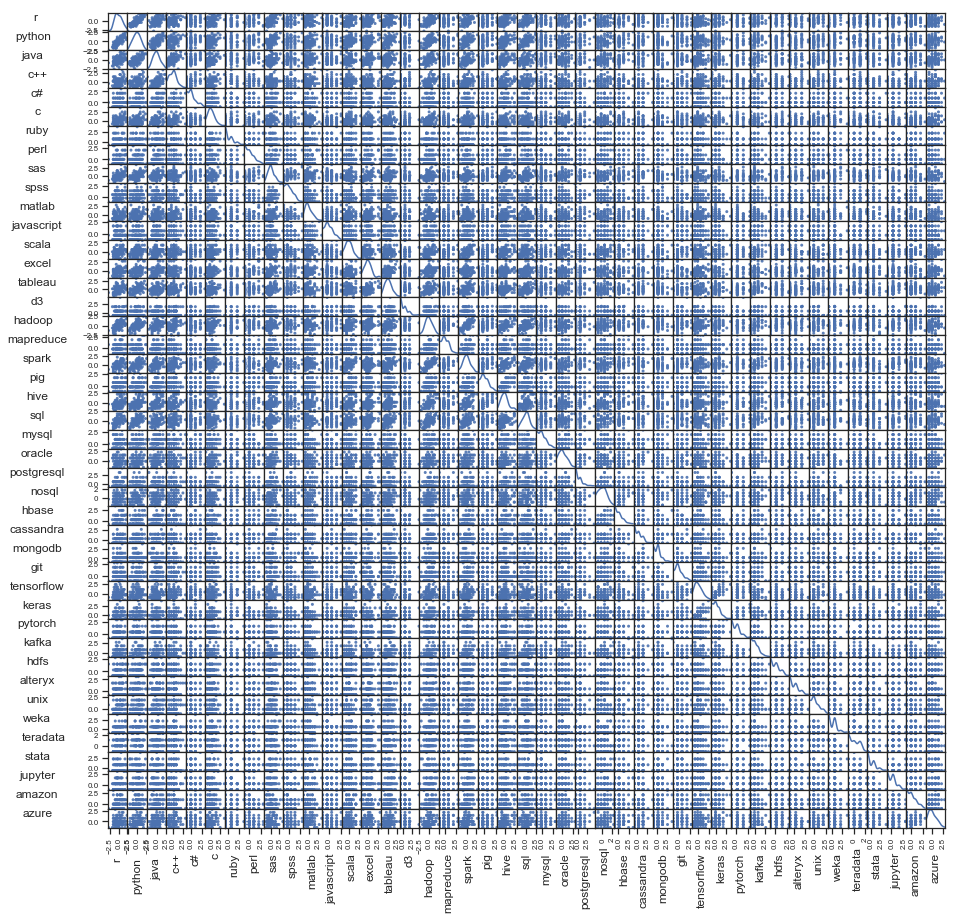

In [154]:
mpl.rcParams['font.size'] = 15
mpl.rcParams.update()
sm = pd.plotting.scatter_matrix(frame=standardized_data_just_nonzero_prob_skills_metric[important_skills],
                               figsize = (15,15),
                                alpha=.9,
                               diagonal='kde')

# The font in the original scatter_matrix plot is a complete mess
n = len(standardized_data_just_nonzero_prob_skills_metric[important_skills].columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = sm[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50
plt.show()

# Remove some non-normal distributions

In [17]:
# Trim the important skills (c#,ruby,perl,javascript,d3,mapreduce,pig)
trimmed_important_skills = [x for x in important_skills
                            if x not in ['c#','ruby','perl','javascript','d3','mapreduce','pig','oracle','nosql','tensorflow','keras']]

# Look at the scatterplots again

In [ ]:
mpl.rcParams['font.size'] = 15
mpl.rcParams.update()
sm = pd.plotting.scatter_matrix(frame=standardized_data_just_nonzero_prob_skills_metric[trimmed_important_skills[0:19]],
                               figsize = (15,15),
                                alpha=.9,
                               diagonal='kde')
plt.show()

# Remove some non-normal distributions

In [18]:
# Trim the important skills (c#,ruby,perl,javascript,d3,mapreduce,pig)
# Also trim (spss,postgres,mysql)
trimmed_important_skills = [x for x in important_skills
                            if x not in ['c#','ruby','perl','javascript','d3','mapreduce','pig','oracle','nosql','tensorflow','keras',
                                         'spss','mysql']]

In [60]:
len(trimmed_important_skills)

30

# Look at the scatterplots again

In [153]:
mpl.rcParams['font.size'] = 15
mpl.rcParams.update()
sm = pd.plotting.scatter_matrix(frame=standardized_data_just_nonzero_prob_skills_metric[trimmed_important_skills[17:34]],
                               figsize = (15,15),
                                alpha=.9,
                               diagonal='kde')
plt.show()

ValueError: num must be 1 <= num <= 0, not 1

<Figure size 1080x1080 with 0 Axes>

# Remove some non-normal distributions


In [19]:
# Trim the important skills (c#,ruby,perl,javascript,d3,mapreduce,pig)
# Also trim (spss,postgres,mysql)
# Also trim (hbase, cassandra, mongodb, git, pytorch, kafka, hdfs,
#           alteryx, unix, weka, teradata, stata, jupyter, amazon)
trimmed_important_skills = [x for x in important_skills
                            if x not in ['c#','ruby','perl','javascript','d3','mapreduce','pig','oracle','nosql','tensorflow','keras',
                                         'spss','mysql',
                                        'hbase', 'cassandra','mongodb','git','pytorch',
                                         'kafka','hdfs','alteryx','unix','weka','teradata',
                                         'stata','jupyter','amazon','azure']]

In [62]:
len(trimmed_important_skills)

15

# Look at the scatterplots again

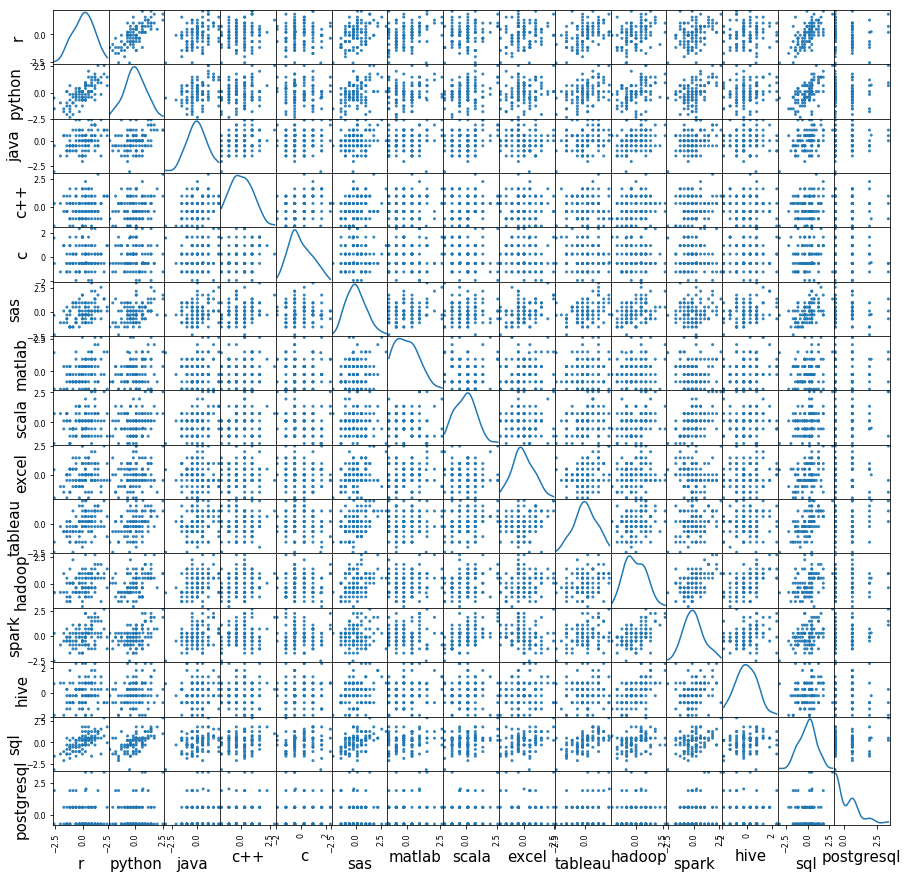

In [23]:
mpl.rcParams['font.size'] = 15
mpl.rcParams.update()
sm = pd.plotting.scatter_matrix(frame=standardized_data_just_nonzero_prob_skills_metric[trimmed_important_skills],
                               figsize = (15,15),
                                alpha=.9,
                               diagonal='kde')
plt.show()

# Remove some non-normal distributions


In [20]:
# Trim the important skills (c#,ruby,perl,javascript,d3,mapreduce,pig)
# Also trim (spss,postgres,mysql)
# Also trim (hbase, cassandra, mongodb, git, pytorch, kafka, hdfs,
#           alteryx, unix, weka, teradata, stata, jupyter, amazon)
# Also trim (postgresql)
trimmed_important_skills = [x for x in important_skills
                            if x not in ['c#','ruby','perl','javascript','d3','mapreduce','pig','oracle','nosql','tensorflow','keras',
                                         'spss','mysql',
                                        'hbase', 'cassandra','mongodb','git','pytorch',
                                         'kafka','hdfs','alteryx','unix','weka','teradata',
                                         'stata','jupyter','amazon','azure',
                                        'postgresql',]]

# Look at the scatterplots again

In [ ]:
mpl.rcParams['font.size'] = 15
mpl.rcParams.update()
sm = pd.plotting.scatter_matrix(frame=standardized_data_just_nonzero_prob_skills_metric[trimmed_important_skills],
                               figsize = (15,15),
                                alpha=.9,
                               diagonal='kde')
plt.show()
plt.savefig('data_scientist_skills_trimmed_corr_matrix.png')

# View the Correlation Matrix

In [64]:
corr_matrix = []
corr_matrix = standardized_data_just_nonzero_prob_skills_metric[trimmed_important_skills].corr()
corr_matrix

r    python      java       c++         c       sas    matlab  \
r        1.000000  0.724721  0.416879  0.312179  0.009393  0.364747  0.375765   
python   0.724721  1.000000  0.529552  0.384696  0.061975  0.328218  0.318152   
java     0.416879  0.529552  1.000000  0.417288  0.159405  0.124389  0.330818   
c++      0.312179  0.384696  0.417288  1.000000  0.458786  0.076938  0.306591   
c        0.009393  0.061975  0.159405  0.458786  1.000000 -0.162612  0.161550   
sas      0.364747  0.328218  0.124389  0.076938 -0.162612  1.000000  0.141933   
matlab   0.375765  0.318152  0.330818  0.306591  0.161550  0.141933  1.000000   
scala    0.269832  0.278156  0.372858  0.246438  0.222419  0.008388  0.134797   
excel    0.039523  0.135235  0.086116 -0.045897 -0.238590  0.310780  0.121186   
tableau  0.474932  0.470214  0.135901 -0.085400 -0.293363  0.403654  0.028495   
hadoop   0.412938  0.440648  0.262516  0.224306  0.081655  0.231517  0.234632   
spark    0.473752  0.458796  0.406802  0.207722  0.024798  0.223302  0.100334   
hive     0.242818  0.324922  0.173898  0.149878  0.181363  0.237540  0.015703   
sql      0.541498  0.599513  0.385538  0.103102 -0.127851  0.376552  0.178226   

            scala     excel   tableau    hadoop     spark      hive       sql  
r        0.269832  0.039523  0.474932  0.412938  0.473752  0.242818  0.541498  
python   0.278156  0.135235  0.470214  0.440648  0.458796  0.324922  0.599513  
java     0.372858  0.086116  0.135901  0.262516  0.406802  0.173898  0.385538  
c++      0.246438 -0.045897 -0.085400  0.224306  0.207722  0.149878  0.103102  
c        0.222419 -0.238590 -0.293363  0.081655  0.024798  0.181363 -0.127851  
sas      0.008388  0.310780  0.403654  0.231517  0.223302  0.237540  0.376552  
matlab   0.134797  0.121186  0.028495  0.234632  0.100334  0.015703  0.178226  
scala    1.000000 -0.036798 -0.064427  0.247843  0.447743  0.150088  0.182179  
excel   -0.036798  1.000000  0.287871  0.016689 -0.024094 -0.022823  0.314366  
tableau -0.064427  0.287871  1.000000  0.187701  0.220163  0.054941  0.524567  
hadoop   0.247843  0.016689  0.187701  1.000000  0.619771  0.611580  0.350917  
spark    0.447743 -0.024094  0.220163  0.619771  1.000000  0.494275  0.399700  
hive     0.150088 -0.022823  0.054941  0.611580  0.494275  1.000000  0.291537  
sql      0.182179  0.314366  0.524567  0.350917  0.399700  0.291537  1.000000

# Find co-linear pairs

In [21]:
corr_matrix[corr_matrix>.30]

NameError: name 'corr_matrix' is not defined

# Select one elecent from each co-linear pair

In [ ]:
# Co-linear Pairs: (r,python),(r,hadoop),(r,spark),(r,sql),
#                  (python,sas),(python,hadoop),(python,spark),(python,sql)
#                  (c++,c),(sas,tableau)
#                  (scala,spark)
#                  (tableau,sql)
#                  (hadoop,spark),(hadoop,hive),(hadoop,sql),(hadoop,sql)
#                  (spark,hive),(spark,sql)
#                  (java,spark),(java,sql),(java,c)
#                  (excel,sql)
#                  (matlab,sql)
#                  

# Feature removal from pairs: r ,c,sas,scala,tableau,hadoop,hive,c,matlab,spark

trimmed_important_skills = [x for x in trimmed_important_skills
                           if x not in ['r' ,'c','sas','scala','tableau','hadoop','hive','matlab','spark']] 

# Look at the scatterplots again

In [ ]:
mpl.rcParams['font.size'] = 15
mpl.rcParams.update()
sm = pd.plotting.scatter_matrix(frame=standardized_data_just_nonzero_prob_skills_metric[trimmed_important_skills],
                               figsize = (15,15),
                                alpha=.9,
                               diagonal='kde')
plt.show()


# View the Correlation Matrix

In [22]:
corr_matrix = []
corr_matrix = standardized_data_just_nonzero_prob_skills_metric[trimmed_important_skills].corr()
corr_matrix

r    python      java       c++         c       sas    matlab  \
r        1.000000  0.866539  0.411822  0.286229  0.270285  0.621733  0.422828   
python   0.866539  1.000000  0.468528  0.407299  0.346509  0.530284  0.401596   
java     0.411822  0.468528  1.000000  0.442251  0.361784  0.189889  0.201061   
c++      0.286229  0.407299  0.442251  1.000000  0.470444  0.164882  0.187068   
c        0.270285  0.346509  0.361784  0.470444  1.000000  0.129819  0.308444   
sas      0.621733  0.530284  0.189889  0.164882  0.129819  1.000000  0.381029   
matlab   0.422828  0.401596  0.201061  0.187068  0.308444  0.381029  1.000000   
scala    0.229989  0.230607  0.541317  0.303927  0.227990  0.074293  0.074279   
excel    0.215924  0.226153  0.056462 -0.051584 -0.140955  0.392942  0.201796   
tableau  0.434323  0.419647  0.128094  0.196708  0.060172  0.434915  0.101494   
hadoop   0.473946  0.545974  0.500081  0.296576  0.346619  0.200258  0.339586   
spark    0.343712  0.387044  0.399817  0.242365  0.289852  0.182324  0.237086   
hive     0.432828  0.387692  0.350275  0.184348  0.216354  0.278305  0.310090   
sql      0.563948  0.653492  0.285448  0.211989  0.335188  0.465470  0.264256   

            scala     excel   tableau    hadoop     spark      hive       sql  
r        0.229989  0.215924  0.434323  0.473946  0.343712  0.432828  0.563948  
python   0.230607  0.226153  0.419647  0.545974  0.387044  0.387692  0.653492  
java     0.541317  0.056462  0.128094  0.500081  0.399817  0.350275  0.285448  
c++      0.303927 -0.051584  0.196708  0.296576  0.242365  0.184348  0.211989  
c        0.227990 -0.140955  0.060172  0.346619  0.289852  0.216354  0.335188  
sas      0.074293  0.392942  0.434915  0.200258  0.182324  0.278305  0.465470  
matlab   0.074279  0.201796  0.101494  0.339586  0.237086  0.310090  0.264256  
scala    1.000000  0.115893  0.238798  0.344728  0.470056  0.286479  0.136480  
excel    0.115893  1.000000  0.363772  0.174604  0.075488  0.161529  0.389016  
tableau  0.238798  0.363772  1.000000  0.269749  0.350425  0.323609  0.498003  
hadoop   0.344728  0.174604  0.269749  1.000000  0.590764  0.525080  0.395250  
spark    0.470056  0.075488  0.350425  0.590764  1.000000  0.512839  0.320780  
hive     0.286479  0.161529  0.323609  0.525080  0.512839  1.000000  0.383807  
sql      0.136480  0.389016  0.498003  0.395250  0.320780  0.383807  1.000000

# Get the Eigenvalues and Eigenvectors

In [31]:
# Get the order of the eigenvalues
eigenValues,eigenVectors = np.linalg.eig(np.array(corr_matrix))
idx = eigenValues.argsort()[::-1] 
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[idx]
important_skills_eig = np.array(trimmed_important_skills)[idx]
pd.DataFrame(data=eigenValues,index=important_skills_eig)[0].head(15)

java     1.667649
c++      1.174894
sql      0.684871
excel    0.472585
Name: 0, dtype: float64

In [32]:
for ev in eigenVectors:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [33]:
# Make a list of (eigenvalue, eigenvector,skill_title) tuples
eig_pair_with_title = [(np.abs(eigenValues[i]), eigenVectors[:,i],trimmed_important_skills[i]) for i in range(len(eigenValues))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
sorted_by_eig_val = sorted(eig_pair_with_title, key=lambda tup: tup[0])
sorted_by_eig_val_titles = [title[2] for title in sorted_by_eig_val]

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in sorted_by_eig_val:
    print(i[0],i[2])

Eigenvalues in descending order:
(0.47258546820694236, 'sql')
(0.6848708739577466, 'excel')
(1.1748944296788495, 'c++')
(1.667649228156463, 'java')


In [34]:
eigenValues_trim = eigenValues[0:22]
tot = sum(eigenValues_trim)
var_exp = [(i / tot)*100 for i in sorted(eigenValues_trim, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='scatter',
    x = sorted_by_eig_val_titles[::-1][0:22],
    #x=['PC %s' %i for i in range(1,len(eigenValues)+1)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x = sorted_by_eig_val_titles[::-1][0:22],
    # x=['PC %s' %i for i in range(1,len(eigenValues)+1)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~mgiacoma/0 or inside your plot.ly account where it is named 'selecting-principal-components'


In [78]:
# Find features with 'seperable-looking' scatterplots
trimmed_important_skills = ['python','r']

# Use K-Means Clustering 
## ref: https://stackabuse.com/k-means-clustering-with-scikit-learn/


In [23]:
from sklearn.cluster import KMeans

In [24]:
# set up the data as an array 
data_kmeans = np.array(standardized_data_just_nonzero_prob_skills_metric[trimmed_important_skills])
df = []
df = standardized_data_just_nonzero_prob_skills_metric[trimmed_important_skills]

inertia = []

In [33]:
# Number of clusters
kmeans = KMeans(n_clusters=2,n_init=100)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)
# Centroid values
centroids = kmeans.cluster_centers_
# Assign labels
df['labels']=labels
# Get inertia
inertia.append(kmeans.inertia_)
'''
x = data_kmeans[:,0]
y = data_kmeans[:,1]
z = data_kmeans[:,2]

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('R')
ax.set_ylabel('Python')
ax.set_zlabel('Java')
'''

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



"\nx = data_kmeans[:,0]\ny = data_kmeans[:,1]\nz = data_kmeans[:,2]\n\nfig = plt.figure(figsize=(10,10))\n\nmpl.rcParams['font.size']=14\nmpl.rcParams.update()\n\nax = plt.axes(projection='3d')\nax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)\nax.set_xlabel('R')\nax.set_ylabel('Python')\nax.set_zlabel('Java')\n"

# Ref: https://matplotlib.org/1.5.1/examples/mplot3d/text3d_demo.html

In [34]:
# Number of clusters
kmeans = KMeans(n_clusters=3,n_init=100)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)
# Centroid values
centroids = kmeans.cluster_centers_
# Assign labels
df['labels']=labels
# Get inertia
inertia.append(kmeans.inertia_)
'''
x = data_kmeans[:,0]
y = data_kmeans[:,1]
z = data_kmeans[:,2]

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('R')
ax.set_ylabel('Python')
ax.set_zlabel('Java')
'''

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



"\nx = data_kmeans[:,0]\ny = data_kmeans[:,1]\nz = data_kmeans[:,2]\n\nfig = plt.figure(figsize=(10,10))\n\nmpl.rcParams['font.size']=14\nmpl.rcParams.update()\n\nax = plt.axes(projection='3d')\nax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)\nax.set_xlabel('R')\nax.set_ylabel('Python')\nax.set_zlabel('Java')\n"

In [35]:
# Number of clusters
kmeans = KMeans(n_clusters=4,n_init=100)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)
# Centroid values
centroids = kmeans.cluster_centers_
# Assign labels
df['labels']=labels
# Get inertia
inertia.append(kmeans.inertia_)
'''
x = data_kmeans[:,0]
y = data_kmeans[:,1]
z = data_kmeans[:,2]

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('R')
ax.set_ylabel('Python')
ax.set_zlabel('Java')
'''

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



"\nx = data_kmeans[:,0]\ny = data_kmeans[:,1]\nz = data_kmeans[:,2]\n\nfig = plt.figure(figsize=(10,10))\n\nmpl.rcParams['font.size']=14\nmpl.rcParams.update()\n\nax = plt.axes(projection='3d')\nax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)\nax.set_xlabel('R')\nax.set_ylabel('Python')\nax.set_zlabel('Java')\n"

In [36]:
# Number of clusters
kmeans = KMeans(n_clusters=5,n_init=100)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)
# Centroid values
centroids = kmeans.cluster_centers_
# Assign labels
df['labels']=labels
# Get inertia
inertia.append(kmeans.inertia_)
'''
x = data_kmeans[:,0]
y = data_kmeans[:,1]
z = data_kmeans[:,2]

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('R')
ax.set_ylabel('Python')
ax.set_zlabel('Java')
'''

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



"\nx = data_kmeans[:,0]\ny = data_kmeans[:,1]\nz = data_kmeans[:,2]\n\nfig = plt.figure(figsize=(10,10))\n\nmpl.rcParams['font.size']=14\nmpl.rcParams.update()\n\nax = plt.axes(projection='3d')\nax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)\nax.set_xlabel('R')\nax.set_ylabel('Python')\nax.set_zlabel('Java')\n"

In [37]:
# Number of clusters
kmeans = KMeans(n_clusters=6,n_init=100)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)
# Centroid values
centroids = kmeans.cluster_centers_
# Assign labels
df['labels']=labels
# Get inertia
inertia.append(kmeans.inertia_)
'''
x = data_kmeans[:,0]
y = data_kmeans[:,1]
z = data_kmeans[:,2]

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('R')
ax.set_ylabel('Python')
ax.set_zlabel('Java')
'''

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



"\nx = data_kmeans[:,0]\ny = data_kmeans[:,1]\nz = data_kmeans[:,2]\n\nfig = plt.figure(figsize=(10,10))\n\nmpl.rcParams['font.size']=14\nmpl.rcParams.update()\n\nax = plt.axes(projection='3d')\nax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)\nax.set_xlabel('R')\nax.set_ylabel('Python')\nax.set_zlabel('Java')\n"

In [38]:
# Number of clusters
kmeans = KMeans(n_clusters=7,n_init=100)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)
# Centroid values
centroids = kmeans.cluster_centers_
# Assign labels
df['labels']=labels
# Get inertia
inertia.append(kmeans.inertia_)
'''
x = data_kmeans[:,0]
y = data_kmeans[:,1]
z = data_kmeans[:,2]

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('R')
ax.set_ylabel('Python')
ax.set_zlabel('Java')
'''

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



"\nx = data_kmeans[:,0]\ny = data_kmeans[:,1]\nz = data_kmeans[:,2]\n\nfig = plt.figure(figsize=(10,10))\n\nmpl.rcParams['font.size']=14\nmpl.rcParams.update()\n\nax = plt.axes(projection='3d')\nax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)\nax.set_xlabel('R')\nax.set_ylabel('Python')\nax.set_zlabel('Java')\n"

In [39]:
# Number of clusters
kmeans = KMeans(n_clusters=8,n_init=100)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)
# Centroid values
centroids = kmeans.cluster_centers_
# Assign labels
df['labels']=labels
# Get inertia
inertia.append(kmeans.inertia_)
'''
x = data_kmeans[:,0]
y = data_kmeans[:,1]
z = data_kmeans[:,2]

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('R')
ax.set_ylabel('Python')
ax.set_zlabel('Java')
'''

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



"\nx = data_kmeans[:,0]\ny = data_kmeans[:,1]\nz = data_kmeans[:,2]\n\nfig = plt.figure(figsize=(10,10))\n\nmpl.rcParams['font.size']=14\nmpl.rcParams.update()\n\nax = plt.axes(projection='3d')\nax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)\nax.set_xlabel('R')\nax.set_ylabel('Python')\nax.set_zlabel('Java')\n"

In [40]:
# Number of clusters
kmeans = KMeans(n_clusters=9,n_init=100)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)
# Centroid values
centroids = kmeans.cluster_centers_
# Assign labels
df['labels']=labels
# Get inertia
inertia.append(kmeans.inertia_)
'''
x = data_kmeans[:,0]
y = data_kmeans[:,1]
z = data_kmeans[:,2]

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('R')
ax.set_ylabel('Python')
ax.set_zlabel('Java')
'''

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



"\nx = data_kmeans[:,0]\ny = data_kmeans[:,1]\nz = data_kmeans[:,2]\n\nfig = plt.figure(figsize=(10,10))\n\nmpl.rcParams['font.size']=14\nmpl.rcParams.update()\n\nax = plt.axes(projection='3d')\nax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)\nax.set_xlabel('R')\nax.set_ylabel('Python')\nax.set_zlabel('Java')\n"

In [41]:
# Number of clusters
kmeans = KMeans(n_clusters=10,n_init=100)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)
# Centroid values
centroids = kmeans.cluster_centers_
# Assign labels
df['labels']=labels
# Get inertia
inertia.append(kmeans.inertia_)
'''
x = data_kmeans[:,0]
y = data_kmeans[:,1]
z = data_kmeans[:,2]

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('R')
ax.set_ylabel('Python')
ax.set_zlabel('Java')
'''

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



"\nx = data_kmeans[:,0]\ny = data_kmeans[:,1]\nz = data_kmeans[:,2]\n\nfig = plt.figure(figsize=(10,10))\n\nmpl.rcParams['font.size']=14\nmpl.rcParams.update()\n\nax = plt.axes(projection='3d')\nax.scatter3D(x, y, z, c=labels, cmap='rainbow',s=100,linewidth=0.5)\nax.set_xlabel('R')\nax.set_ylabel('Python')\nax.set_zlabel('Java')\n"

# Get inertia plot

In [42]:
inertia

[352.38729200076114,
 281.36221776736534,
 241.40472172469586,
 212.23882949829,
 193.23714864834864,
 176.2728565894086,
 163.50380122937372,
 153.61607831544615,
 141.87630370359233]

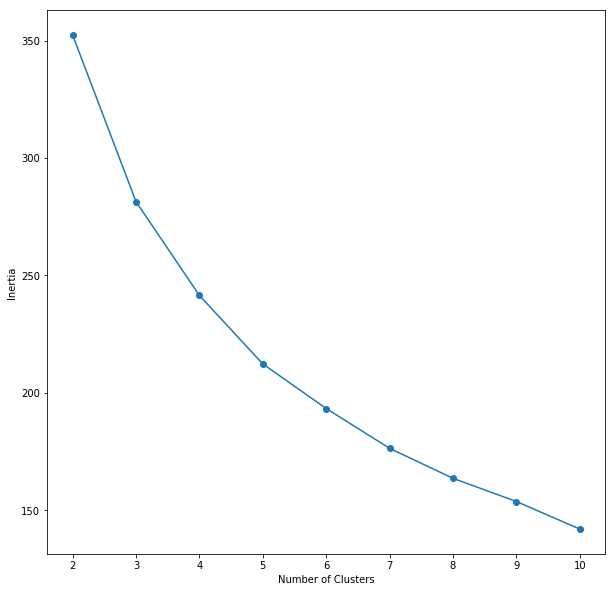

In [43]:
plt.figure(figsize=(10,10))
n_clusters = [str(n) for n in np.arange(2,11)]
plt.scatter(n_clusters,inertia)
plt.plot(n_clusters,inertia,linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Use k-means Clustering

In [117]:
num_cluster = 3
# Number of clusters
kmeans = KMeans(n_clusters=num_cluster)
# Fitting the input data
kmeans = kmeans.fit(data_kmeans)
# Getting the cluster labels
labels = kmeans.predict(data_kmeans)

In [118]:
# Add the labels to the original distribution
data_just_nonzero_prob_skills_metric['labels'] = labels

In [119]:
# Store the clusters in a DataFrame 
clusters = []
clusters = data_just_nonzero_prob_skills_metric.groupby('labels').mean().T

# Make Func to color the plots

In [120]:
from matplotlib import cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# make a definition to return the rgba values for each histogram
def get_colors(data):
    data = np.array(data)
    norm = Normalize(vmin=min(data),vmax=max(data))
    sm = ScalarMappable(norm=norm,cmap='Set2')
    colors = sm.to_rgba(data)
    return colors

# Lets look at the clusters distributions

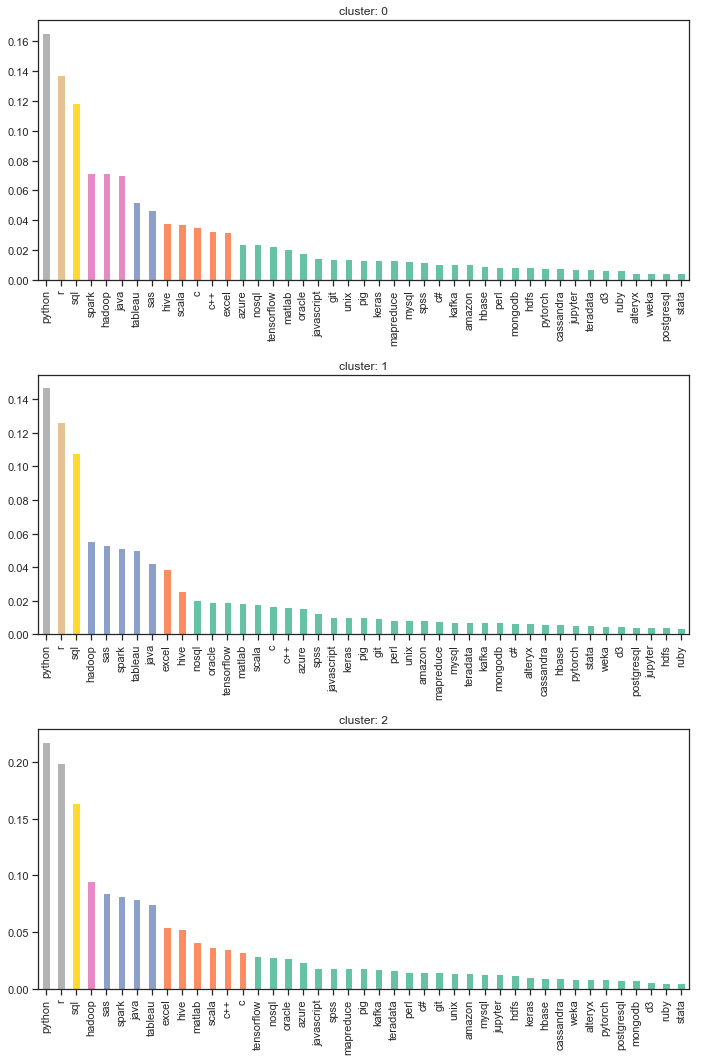

In [121]:
# Look at the skill distributions in the sublplots
fig,ax = plt.subplots(nrows=len(clusters.columns),ncols=1,figsize=(10,15))
for i in range(len(clusters.columns)):
    ax[i].set_title('cluster: '+str(i))
    clusters[i].sort_values(ascending=False).plot(ax=ax[i],kind='bar',color = get_colors(clusters[i].sort_values(ascending=False)))
plt.tight_layout()
plt.show()
fig.savefig('figs/k-means_clusters_'+str(num_cluster)+'_hist_data_scientist_skills.png')

# Look at the scatterplots with color labels

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



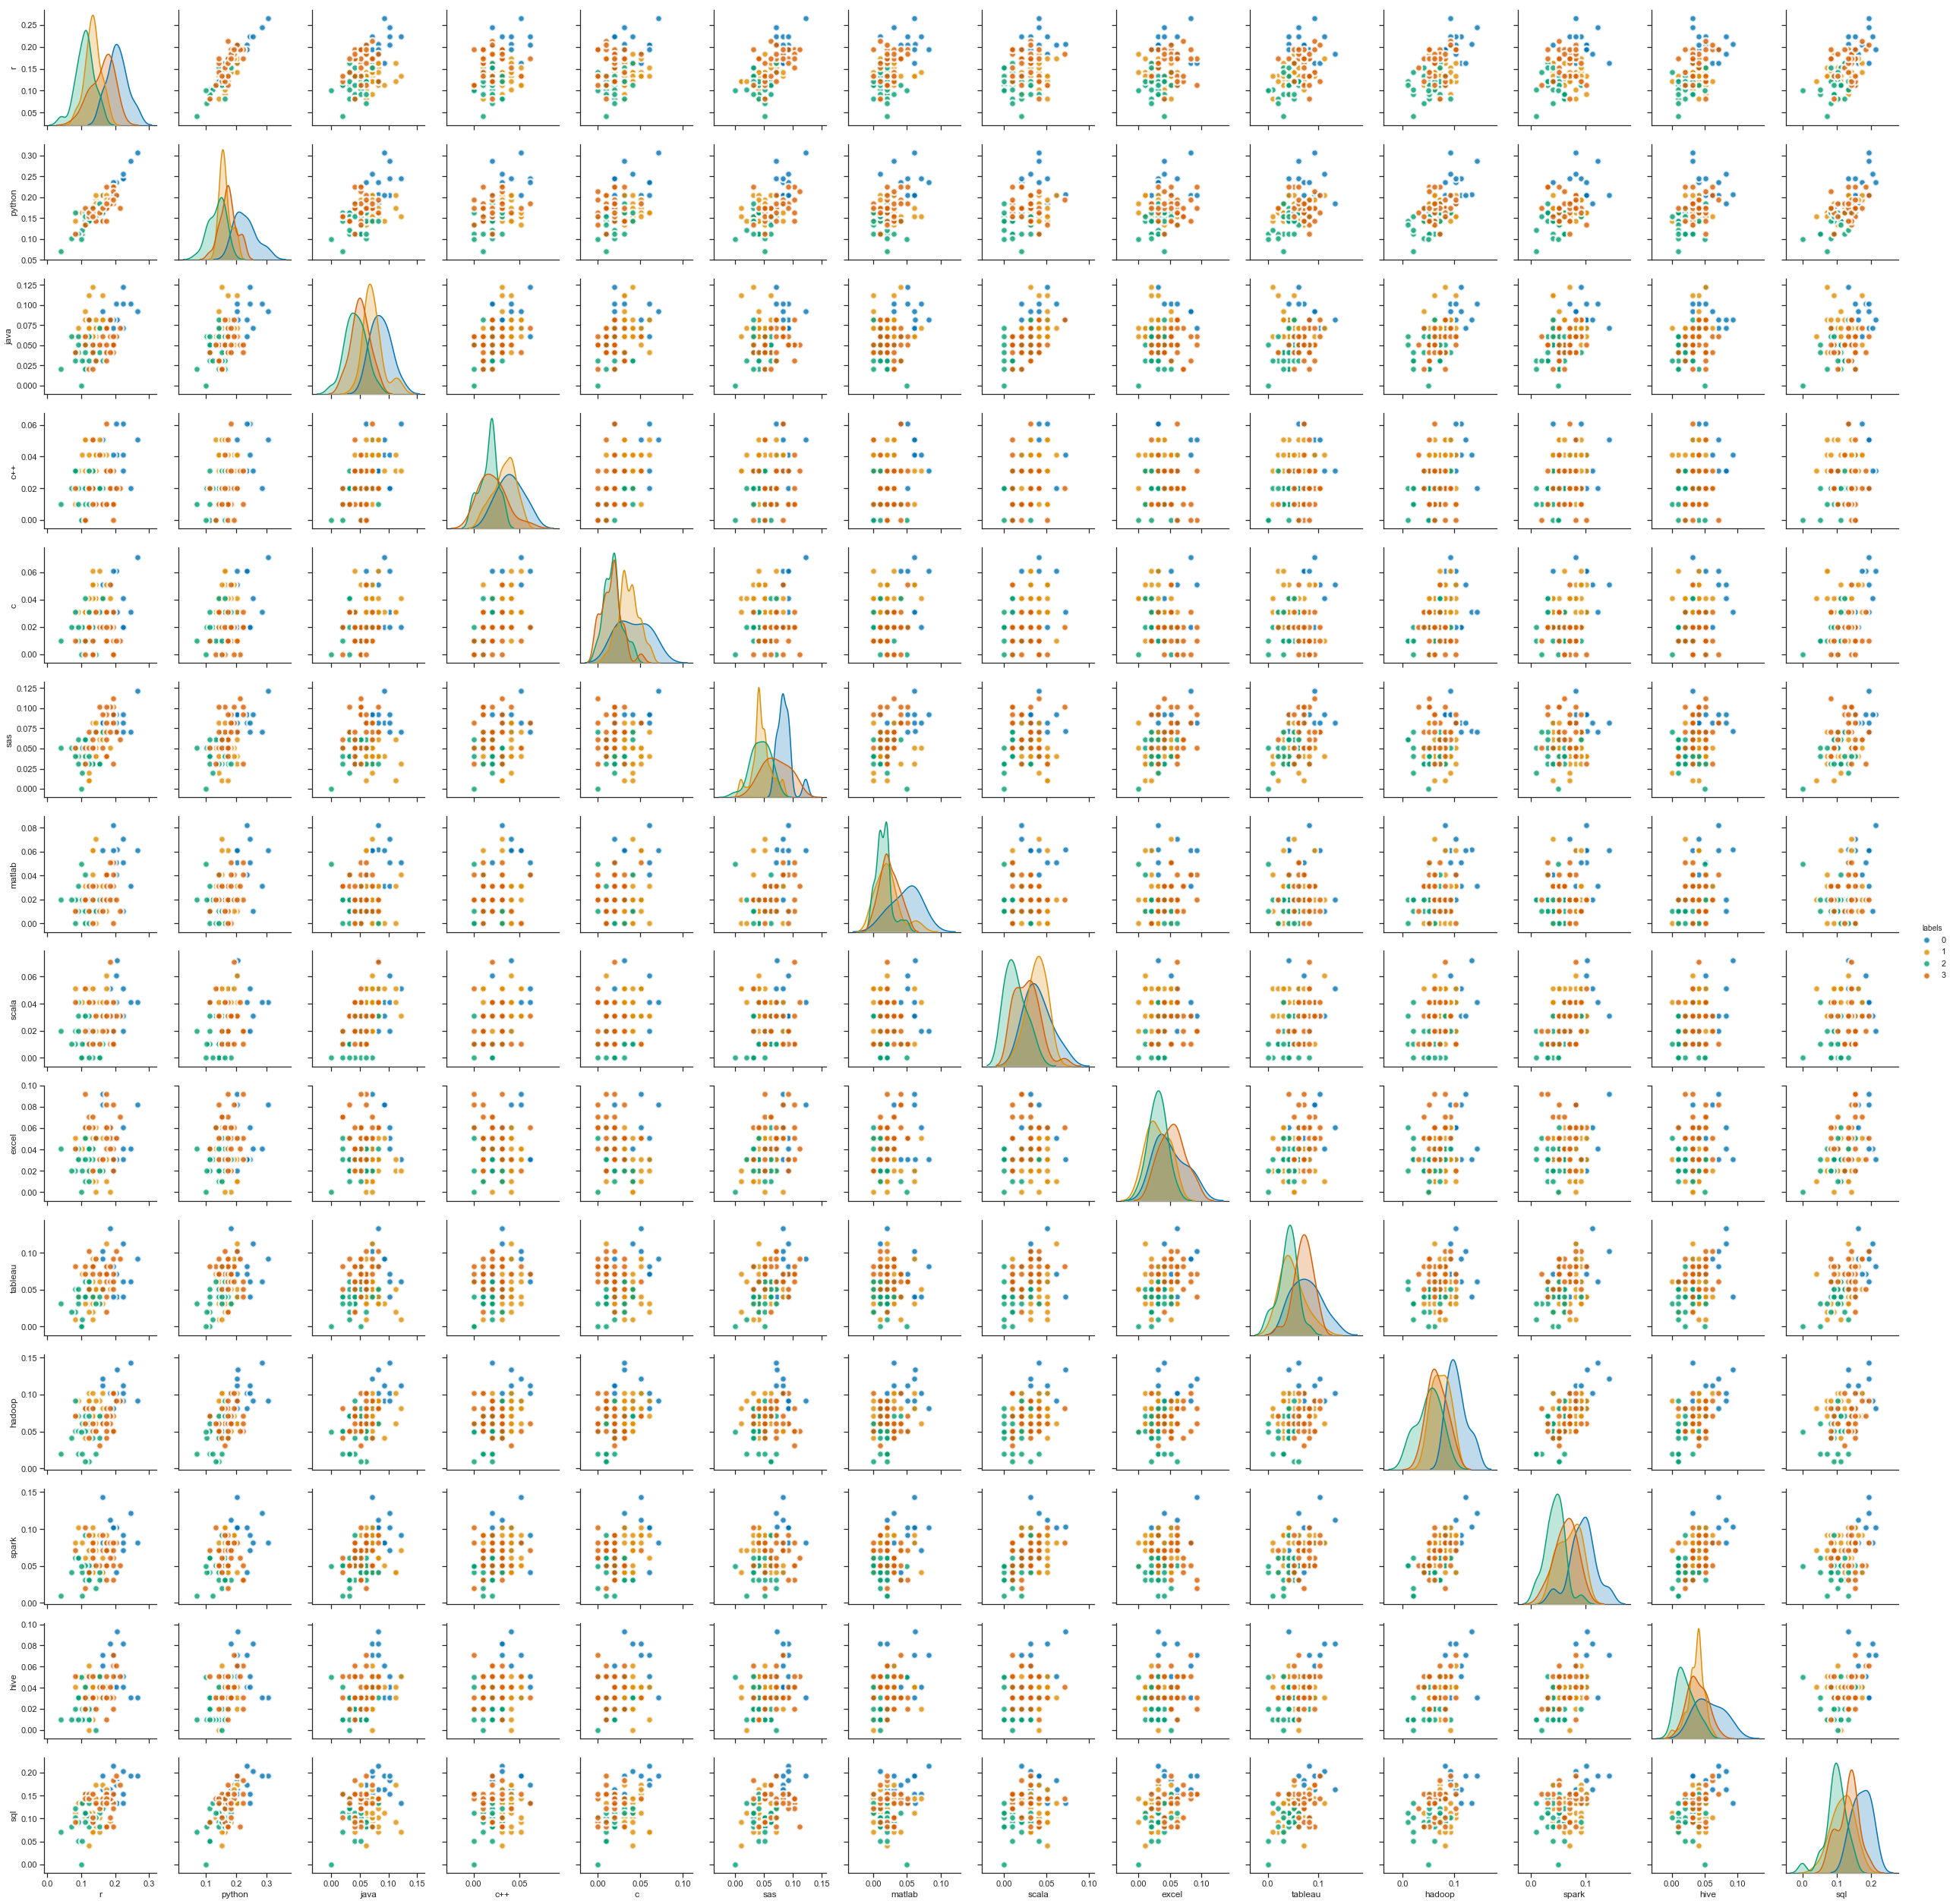

In [30]:
# We need the label column as a string in the dataframe for the sns hue column
trim_skills_and_label = [x for x in trimmed_important_skills]
trim_skills_and_label.append('labels')

import seaborn as sns
sns.set(style="ticks")

# Make a dataframe with both features and feature groups
df = data_just_nonzero_prob_skills_metric[trim_skills_and_label] 

# Make the group label column into a string for pairplots function
df['labels'].apply('str')

sns.pairplot(df,
             # Tell pairplot which columns to plot
             vars = trimmed_important_skills ,
             # Tell pairplot which column labels the levels
             hue='labels',
             # Change the palette used to color the groups of points
             palette='colorblind',
             # Edit the scatter point attributes
            plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.8))

mpl.rcParams['font.size'] = 15
mpl.rcParams.update()
plt.savefig('figs/k-means_clusters_'+str(num_cluster)+'_clusters_colored_scatter.png')

# Show Agglomerative Clustering Dendrogram
## ref: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [108]:
len(trimmed_important_skills),len(trimmed_important_skills)

(14, 14)

In [109]:
import scipy.cluster.hierarchy as shc

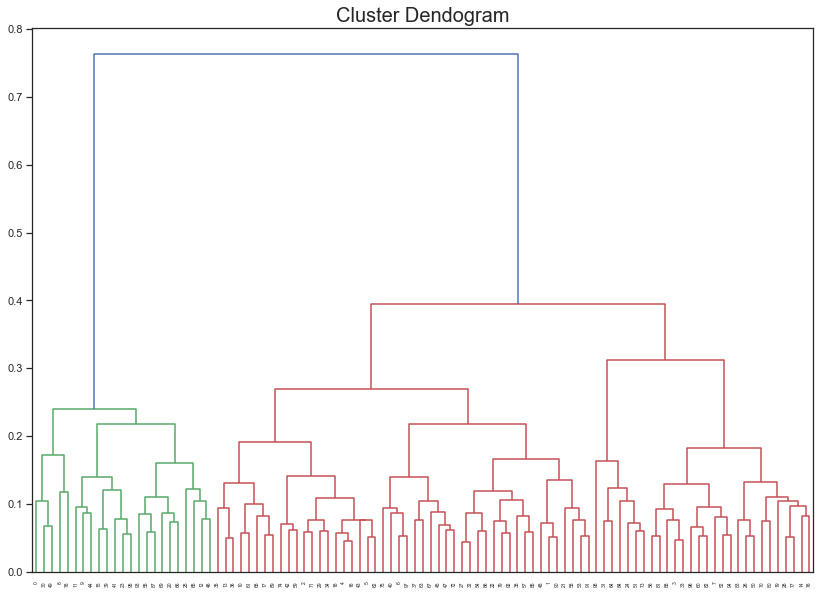

In [42]:
plt.figure(figsize=(14, 10))  
plt.title("Cluster Dendogram",fontsize=20)  
dend = shc.dendrogram(shc.linkage(data_just_nonzero_prob_skills_metric[trimmed_important_skills], method='ward'),)

# Use Agglomerative Clustering 
## ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-examples-cluster-plot-digits-linkage-py
## ref: https://scikit-learn.org/stable/modules/clustering.html

# Create a Func to get Ward-linkage Agglomerative Clustering labels for n clusters

In [44]:
from sklearn import cluster
def ward_cluster(num_cluster, data):
    # This functon uses ward-linkage type agglomerative clustering to cluster 
    # the data for num_cluster number of clusters and returns the labels

    ward = cluster.AgglomerativeClustering(linkage='ward',n_clusters=num_cluster)
    ward.fit(data)
    labels = ward.labels_
    return labels

In [45]:
# Store the data in an array for the fit
data_ward_agg = []
data_ward_agg = np.array(data_just_nonzero_prob_skills_metric[trimmed_important_skills])

# Get the labels for the fittings from each number of clusters
labels=[]
for num_cluster in np.arange(2,12):
    labels.append(ward_cluster(num_cluster,data_ward_agg))

# Look at skill histograms for group labels for num_cluster=...

In [173]:
num_cluster=2
k = num_cluster - 2
# Add the labels to the original distribution
data_just_nonzero_prob_skills_metric['labels'] = labels[k]

# Store the clusters in a DataFrame 
clusters = []
clusters = data_just_nonzero_prob_skills_metric.groupby('labels').mean().T

# Look at the skill distributions in the sublplots
fig,ax = plt.subplots(nrows=len(clusters.columns),ncols=1,figsize=(10,15))
for i in range(len(clusters.columns)):
    ax[i].set_title('cluster: '+str(i))
    clusters[i].sort_values(ascending=False).plot(ax=ax[i],kind='bar',color = get_colors(clusters[i].sort_values(ascending=False)))
plt.tight_layout()
plt.show()
fig.savefig('figs/ward-agglomeratice_'+str(num_cluster)+'_clusters_hist_data_scientist_skills.png')

ValueError: Length of values does not match length of index

# Look at the scatterplot with cluster labels

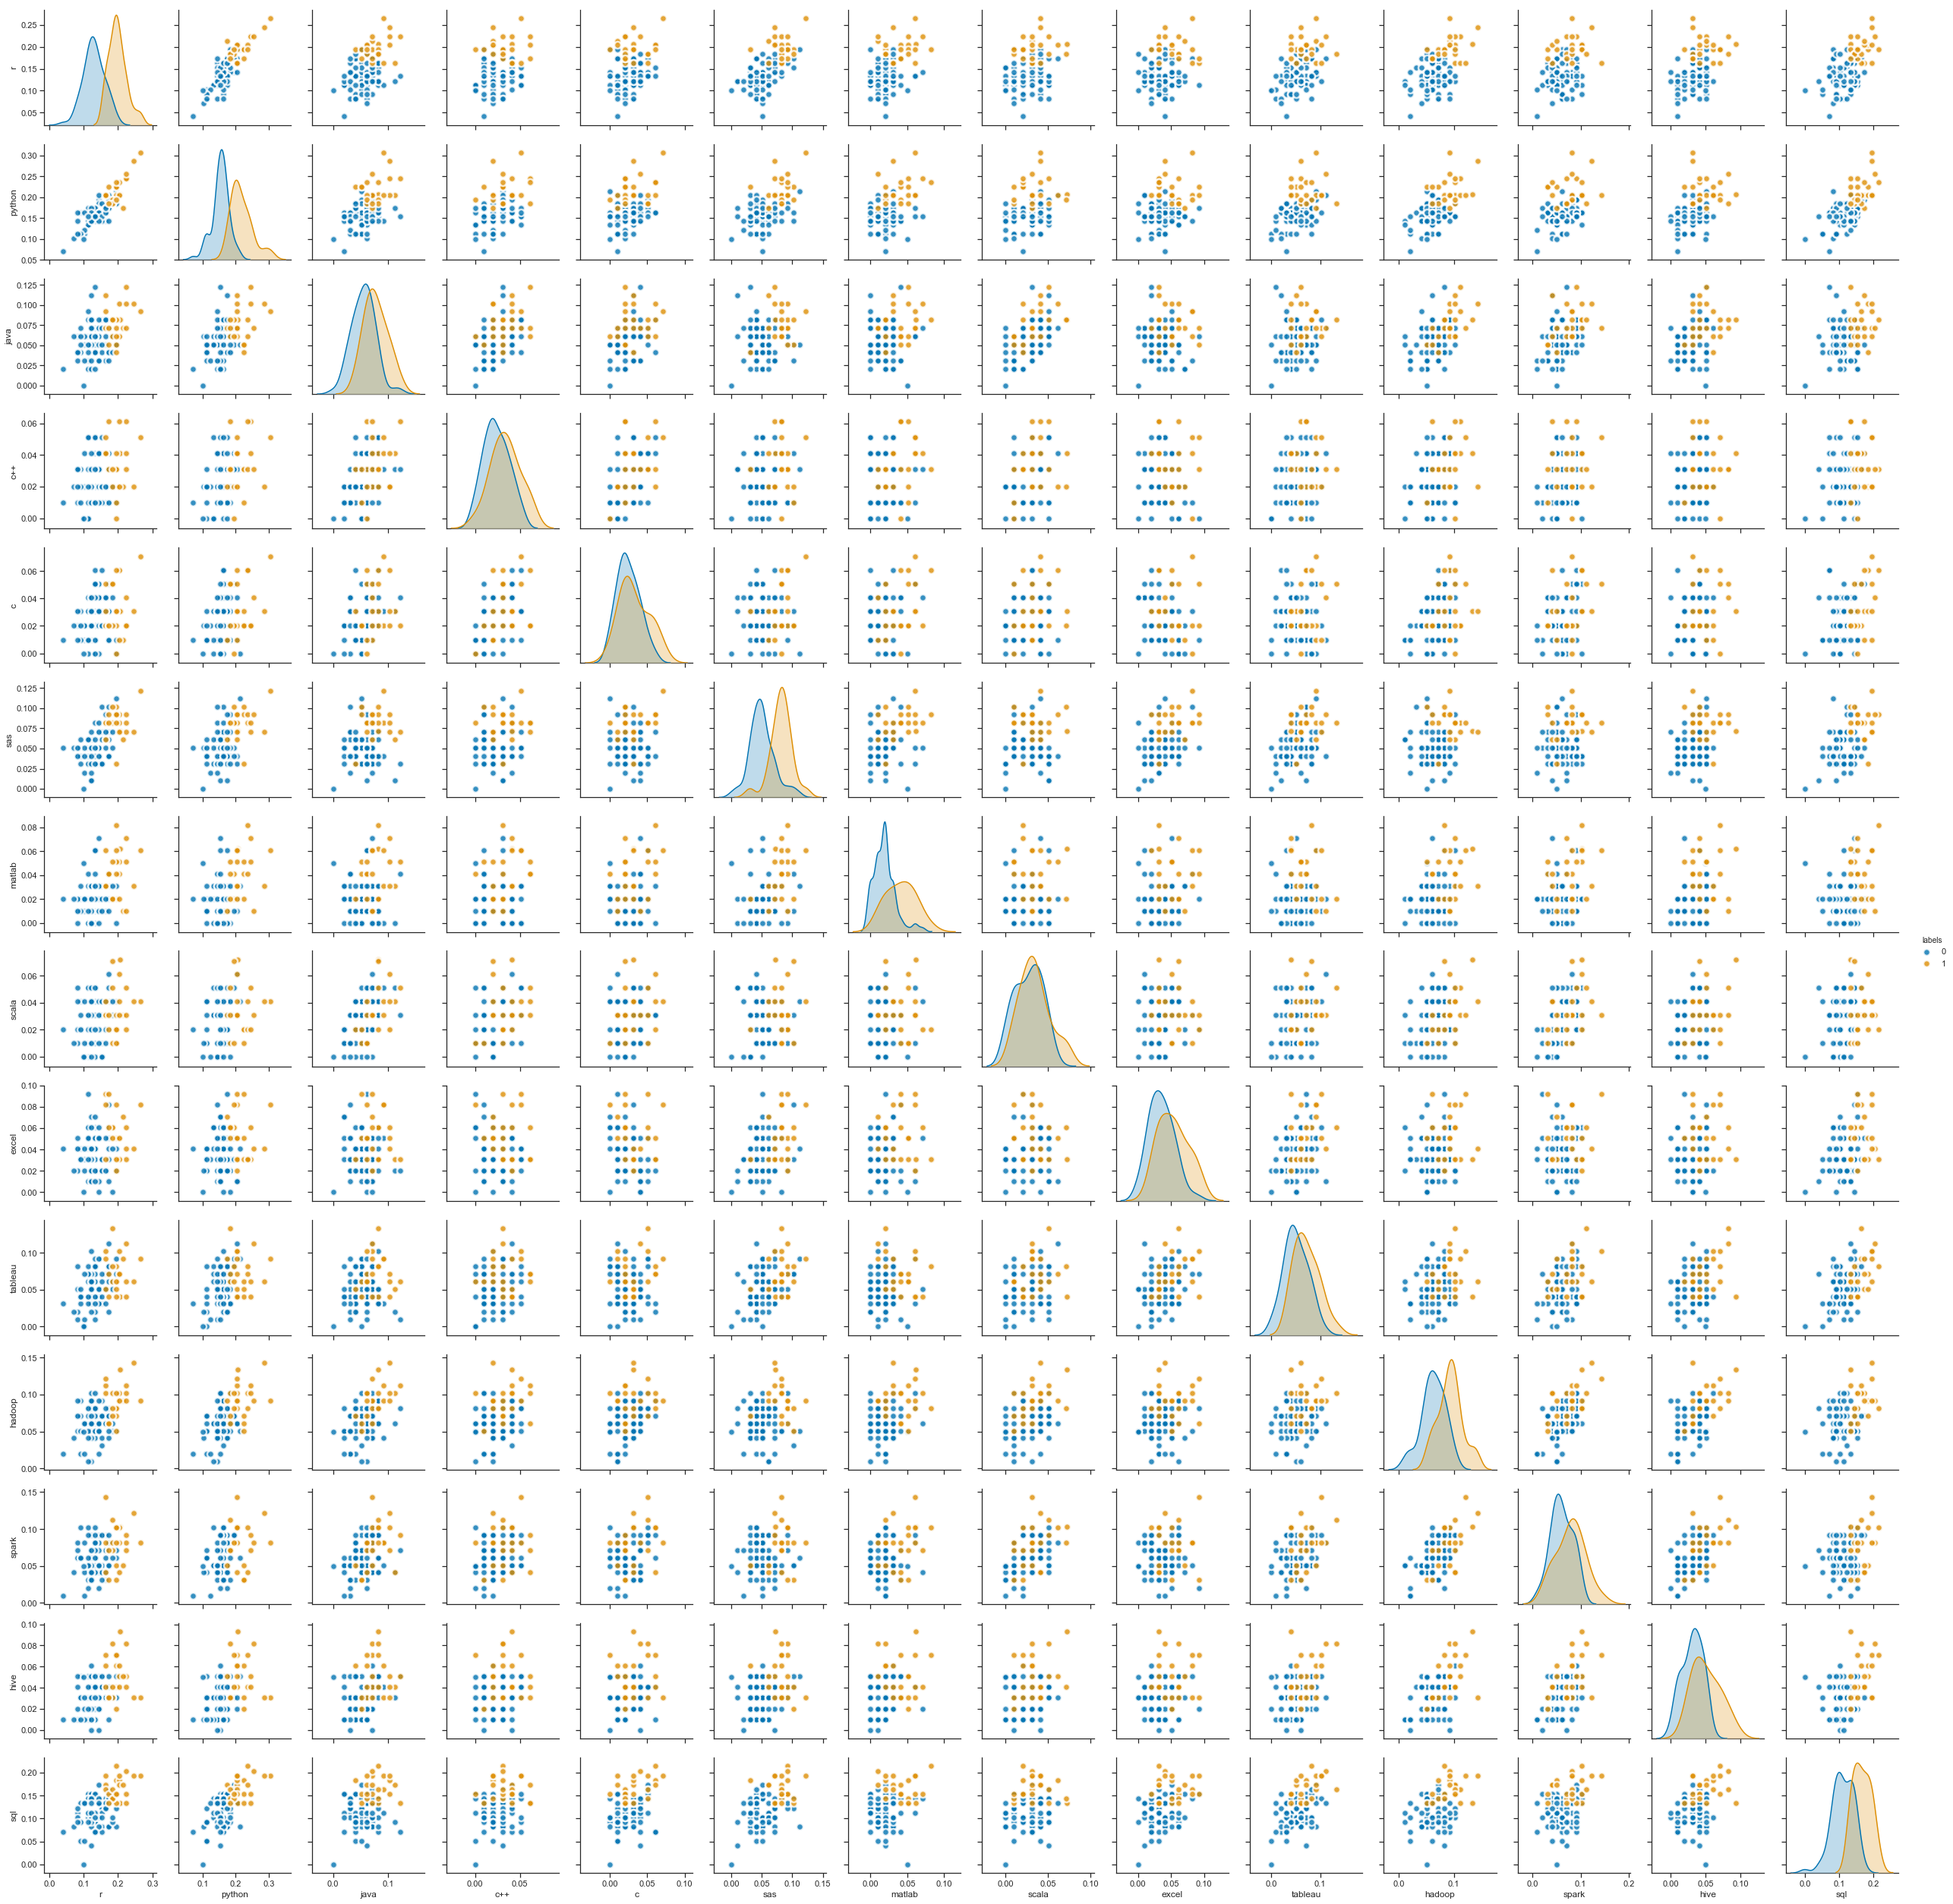

In [47]:
# We need the label column in the dataframe for the sns hue column
trim_skills_and_label = [x for x in trimmed_important_skills]
trim_skills_and_label.append('labels')

import seaborn as sns
sns.set(style="ticks")

# Make a dataframe with both features and feature groups
df = data_just_nonzero_prob_skills_metric[trim_skills_and_label] 

# Make the group label column into a string for pairplots function
df['labels'].apply('str')

sns.pairplot(df,
             # Tell pairplot which columns to plot
             vars = trimmed_important_skills ,
             # Tell pairplot which column labels the levels
             hue='labels',
             # Change the palette used to color the groups of points
             palette='colorblind',
             # Edit the scatter point attributes
            plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.8))

mpl.rcParams['font.size'] = 15
mpl.rcParams.update()
plt.savefig('figs/ward_agglomerative_'+str(num_cluster)+'_clusters_colored_scatter.png')


# 3D Plot Example

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib notebook

x = standardized_data_just_nonzero_prob_skills_metric['python']
y = standardized_data_just_nonzero_prob_skills_metric['sas']
z = standardized_data_just_nonzero_prob_skills_metric['spark']

fig = plt.figure(figsize=(10,10))

mpl.rcParams['font.size']=14
mpl.rcParams.update()

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=labels[k], cmap='rainbow',s=100,linewidth=0.5)
ax.set_xlabel('Python')
ax.set_ylabel('SAS')
ax.set_zlabel('Spark')


# Show Agglomerative Clustering Dendrogram for the Corr Matrix
## ref: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [187]:
standardized_data_just_nonzero_prob_skills_metric[important_skills].corr().abs().head(5)

r    python      java       c++        c#         c      ruby  \
r       1.000000  0.866539  0.411822  0.286229  0.209128  0.270285  0.023472   
python  0.866539  1.000000  0.468528  0.407299  0.338712  0.346509  0.037004   
java    0.411822  0.468528  1.000000  0.442251  0.214313  0.361784  0.303336   
c++     0.286229  0.407299  0.442251  1.000000  0.303230  0.470444  0.049241   
c#      0.209128  0.338712  0.214313  0.303230  1.000000  0.242016  0.090163   

            perl       sas      spss  ...     kafka      hdfs   alteryx  \
r       0.204913  0.621733  0.302969  ...  0.259670  0.247773  0.161385   
python  0.227992  0.530284  0.278036  ...  0.200264  0.219993  0.204341   
java    0.130407  0.189889  0.060216  ...  0.286605  0.271835  0.074647   
c++     0.113976  0.164882  0.087334  ...  0.034790  0.086730  0.014037   
c#      0.176748  0.248861  0.102373  ...  0.039875  0.009173  0.130419   

            unix      weka  teradata     stata   jupyter    amazon     azure  
r       0.247435  0.166646  0.380167  0.077069  0.335714  0.197191  0.187697  
python  0.339960  0.146647  0.386013  0.010517  0.279762  0.150986  0.285577  
java    0.331078  0.035408  0.281774  0.080006  0.227225  0.106588  0.323948  
c++     0.237500  0.115585  0.105335  0.021155  0.079019  0.085977  0.232247  
c#      0.165926  0.285102  0.062356  0.083160  0.094216  0.161132  0.045960  

[5 rows x 43 columns]

# Show Dendrogram Rotated
## ref: https://python-graph-gallery.com/401-customised-dendrogram/

/Users/mikegiacomazza/anaconda3/envs/RotatingIpEnv/lib/python2.7/site-packages/ipykernel_launcher.py:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



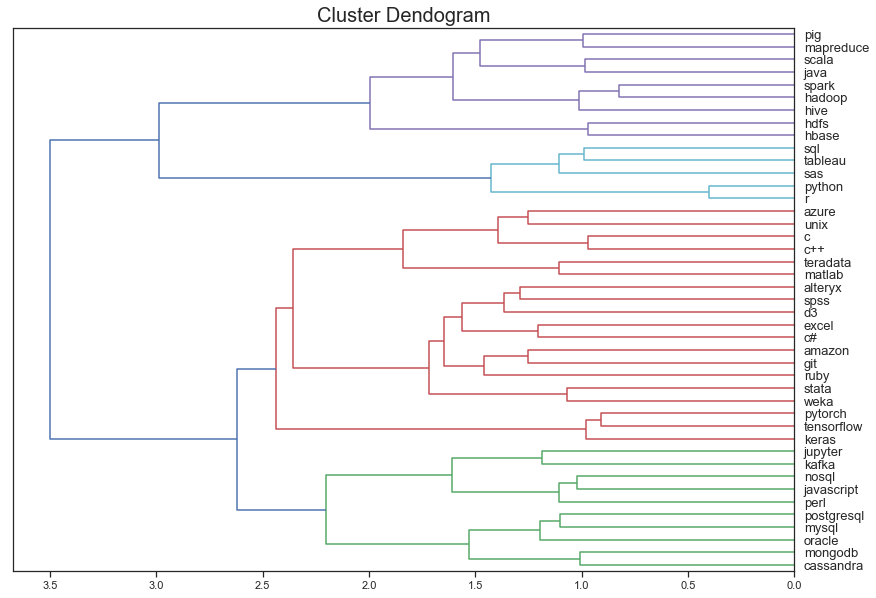

In [150]:
plt.figure(figsize=(14, 10))  
plt.title("Cluster Dendogram",fontsize=20)  
dend = shc.dendrogram(shc.linkage(1-data_just_nonzero_prob_skills_metric[important_skills].corr().abs(), method='ward'),labels=important_skills,orientation='left',leaf_font_size=13)


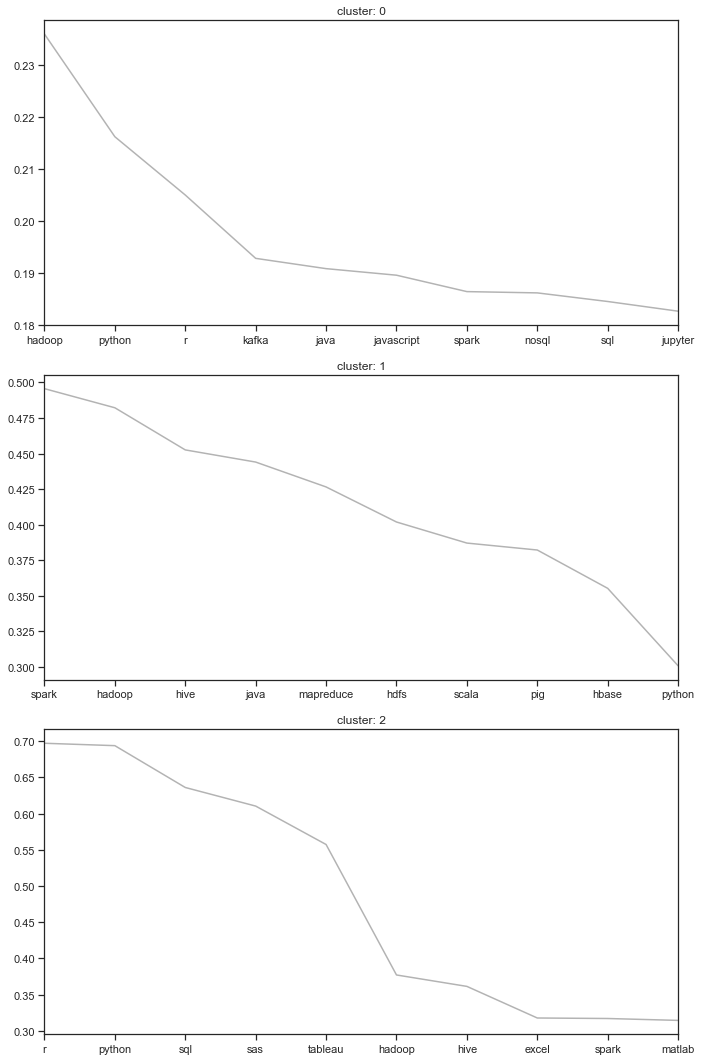

In [172]:
# Store the data in an array for the fit
data_ward_agg = []
data_ward_agg = np.array(standardized_data_just_nonzero_prob_skills_metric[important_skills].corr().abs())
df = standardized_data_just_nonzero_prob_skills_metric[important_skills].corr().abs()
# Get the labels for the fittings from each number of clusters
labels=[]
for num_cluster in np.arange(2,12):
    labels.append(ward_cluster(num_cluster,data_ward_agg))
num_cluster = 3
k = num_cluster - 2
# Add the labels to the original distribution
df['labels'] = labels[k]

# Store the clusters in a DataFrame 
clusters = []
clusters = df.groupby('labels').mean().T

# Look at the skill distributions in the sublplots
fig,ax = plt.subplots(nrows=len(clusters.columns),ncols=1,figsize=(10,15))
for i in range(len(clusters.columns)):
    ax[i].set_title('cluster: '+str(i))
    clusters[i].sort_values(ascending=False)[0:10].plot(ax=ax[i],kind='line',color = get_colors(clusters[i].sort_values(ascending=False)))
plt.tight_layout()
plt.show()
#fig.savefig('figs/ward-agglomeratice_'+str(num_cluster)+'_clusters_hist_data_scientist_skills.png')

# Show the Agglomerative Clustering Pairplots

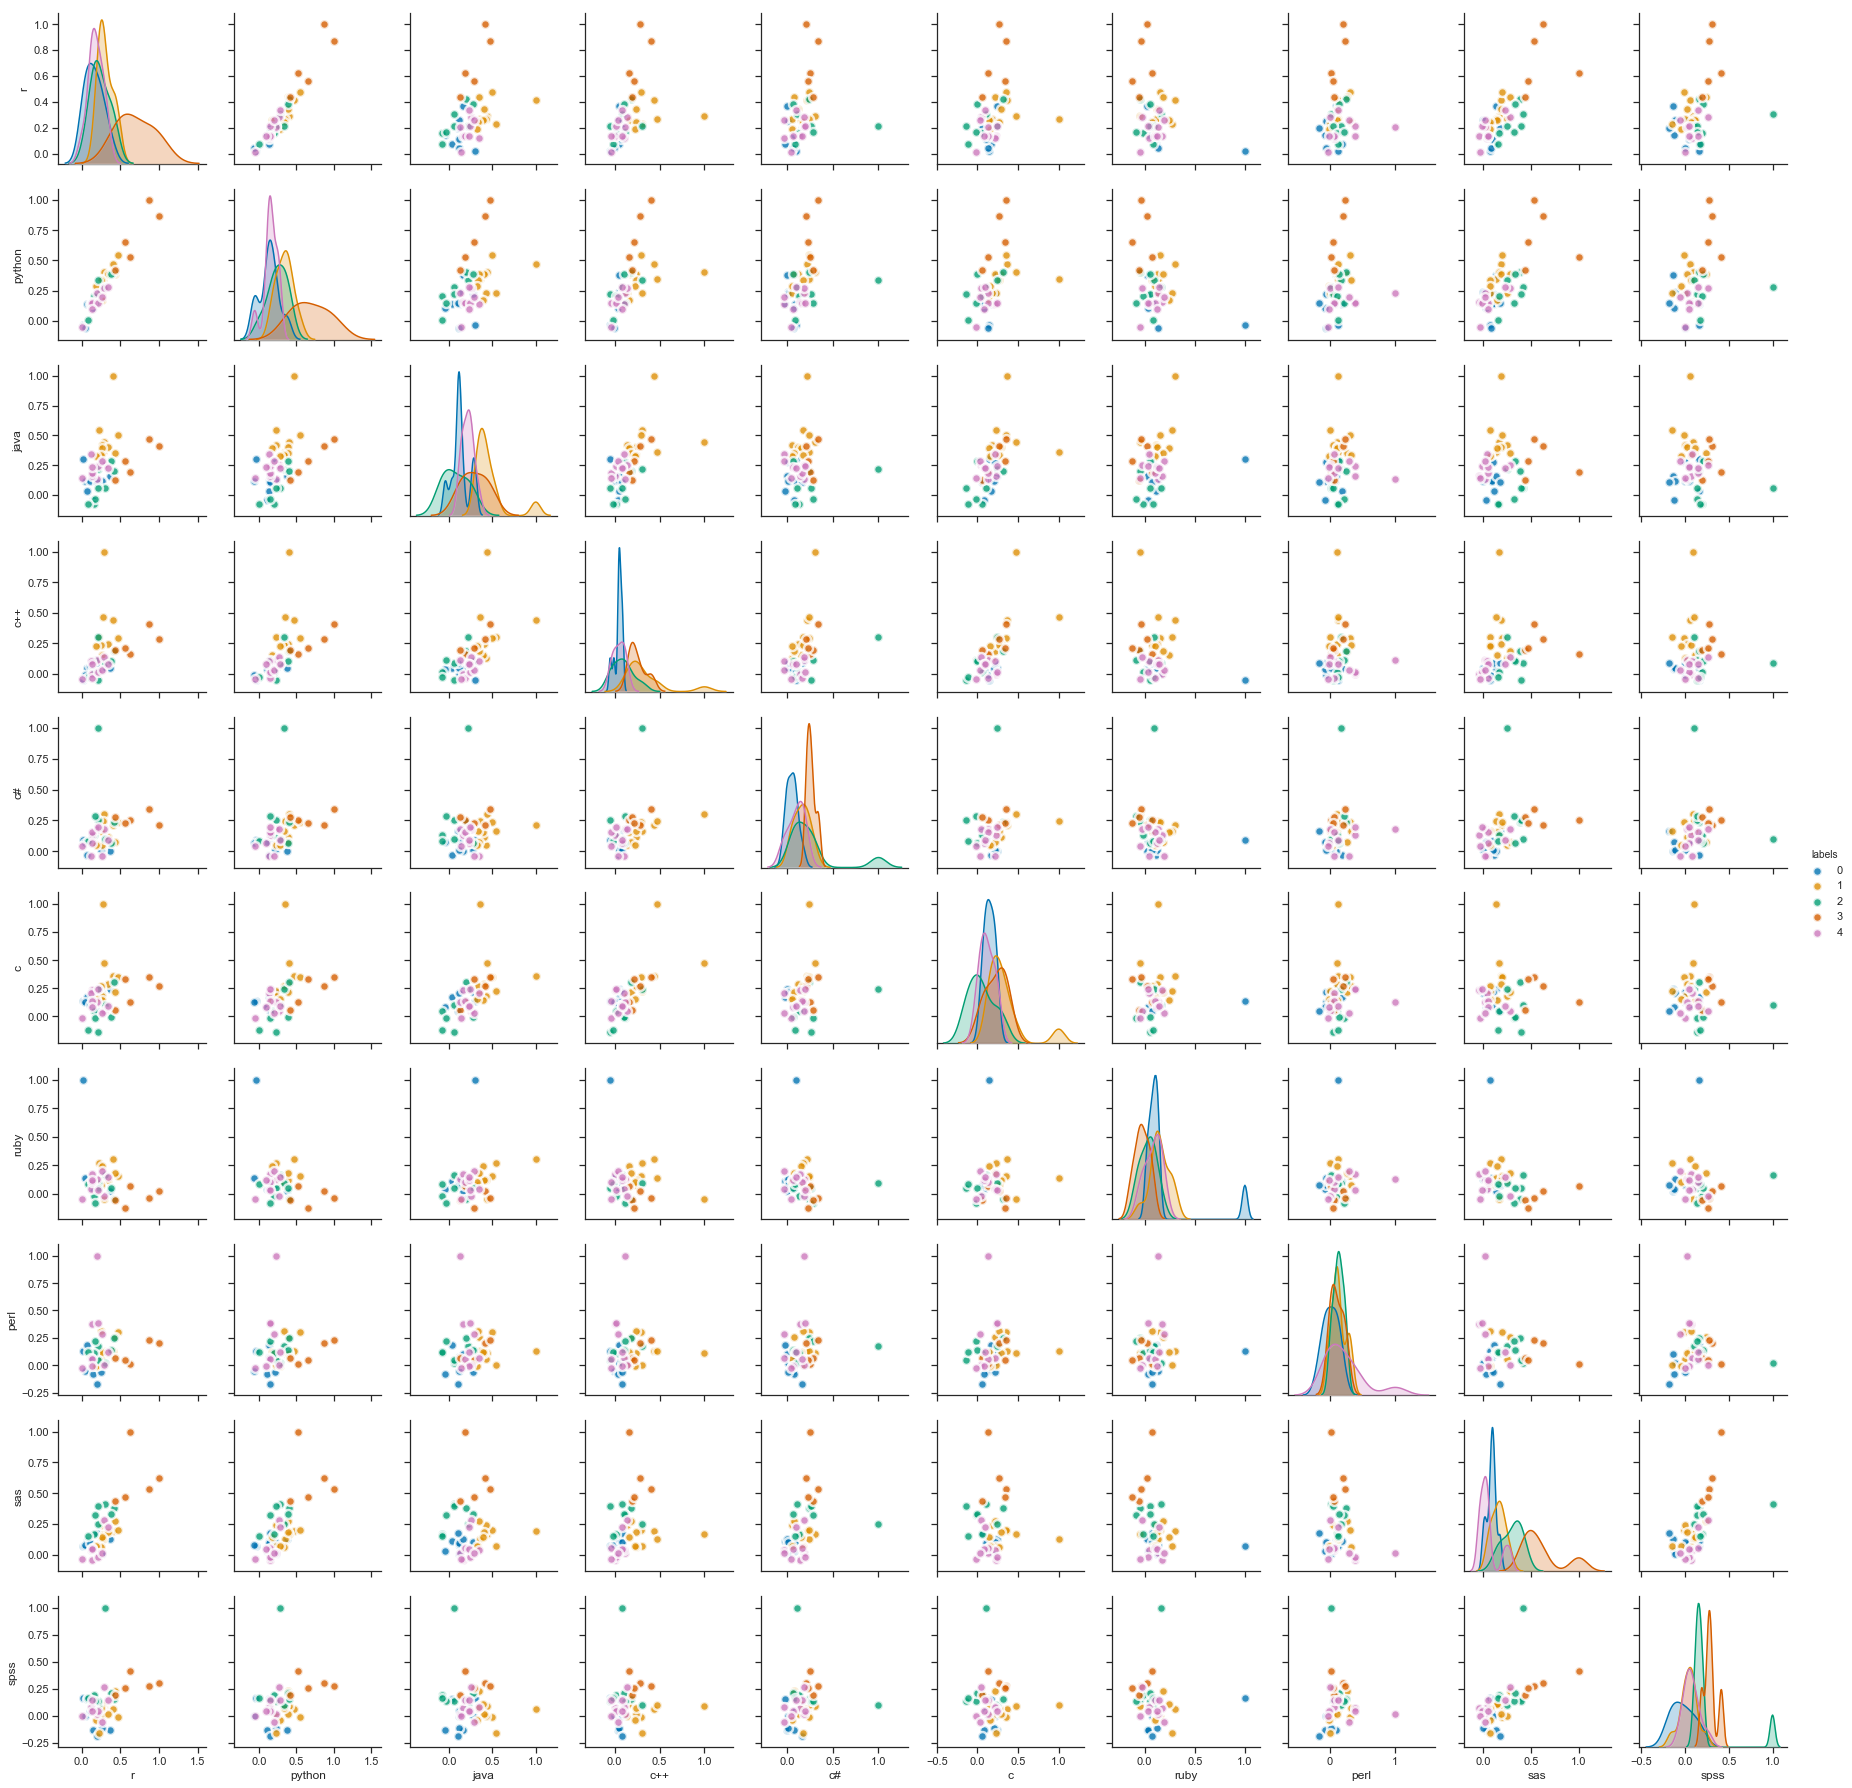

In [76]:
# We need the label column in the dataframe for the sns hue column
important_skills_and_label = [x for x in important_skills[0:10]]
important_skills_and_label.append('labels')

import seaborn as sns
sns.set(style="ticks")

# Make a dataframe with both features and feature groups
df = data_just_nonzero_prob_skills_metric[important_skills].corr()
df = df[important_skills[0:10]]
df['labels'] = labels[k]

# Make the group label column into a string for pairplots function
df['labels'].apply('str')

sns.pairplot(df,
             # Tell pairplot which columns to plot
             vars = important_skills[0:10],
             # Tell pairplot which column labels the levels
             hue='labels',
             # Change the palette used to color the groups of points
             palette='colorblind',
             # Edit the scatter point attributes
            plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.8))

mpl.rcParams['font.size'] = 15
mpl.rcParams.update()
#plt.savefig('figs/ward_agglomerative_'+str(num_cluster)+'_clusters_colored_scatter.png')


# Latent Class Analysis
## ref: http://daob.nl/wp-content/uploads/2015/06/oberski-LCA.pdf

# "Kmodes Clustering is Comparible to Latent Class Analysis"
## ref: http://personal.ee.surrey.ac.uk/Personal/N.Farajidavar/Comparing%20Machine%20Learning%20Clustering%20with%20Latent%20Class%20Analysis%20on%20Cancer%20Symptoms%E2%80%99%20Data.pdf

# Kmodes Clustering
## ref: https://stackoverflow.com/questions/49441280/means-to-save-a-python-kmodes-clustering-model-to-disk <- Example
## ref: https://github.com/nicodv/kmodes <- GitHub

In [243]:
import numpy as np
from kmodes.kmodes import KModes

# Use the Kmodes Clustering on the raw data

In [429]:
data_km = data_just_nonzero_prob_skills[important_skills]
km = KModes(n_clusters=3, init='Huang', n_init=50, verbose=1)
clusters = km.fit_predict(data_km)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 691, cost: 9180.0
Run 1, iteration: 2/100, moves: 394, cost: 9180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 938, cost: 9413.0
Run 2, iteration: 2/100, moves: 445, cost: 9180.0
Run 2, iteration: 3/100, moves: 37, cost: 9180.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 890, cost: 9380.0
Run 3, iteration: 2/100, moves: 123, cost: 9380.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 449, cost: 9711.0
Run 4, iteration: 2/100, moves: 377, cost: 9444.0
Run 4, iteration: 3/100, moves: 11, cost: 9444.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1333, cost: 9247.0
Run 5, iteration: 2/100, moves: 91, cost: 9247.0
In

Init: initializing clusters
Starting iterations...
Run 43, iteration: 1/100, moves: 310, cost: 10662.0
Run 43, iteration: 2/100, moves: 41, cost: 10662.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 44, iteration: 1/100, moves: 1248, cost: 9444.0
Run 44, iteration: 2/100, moves: 426, cost: 9380.0
Run 44, iteration: 3/100, moves: 0, cost: 9380.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 45, iteration: 1/100, moves: 549, cost: 10485.0
Run 45, iteration: 2/100, moves: 0, cost: 10485.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 46, iteration: 1/100, moves: 572, cost: 9444.0
Run 46, iteration: 2/100, moves: 203, cost: 9444.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 47, iteration: 1/100, moves: 259, cost: 10414.0
Run 47, iteration: 2/100, moves: 154, cost: 10414.0
Init: initializing centroids
Init: initializing clusters
Starting 

# Look at WordClouds

In [430]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS) 

# Convert all word cloud text into a single string
def get_comment_words(data):
    comment_words = ' '
    
    # iterate through the job title list 
    for val in list(data['job_title']): 

        # typecaste each val to string 
        val = str(val) 

        # split the title  
        sub_words = val.split() 

        # Converts each sub-word into lowercase 
        for word in range(len(sub_words)): 
            sub_words[word] = sub_words[word].lower() 

        for word in sub_words: 
              comment_words = comment_words + word + ' '
    return comment_words

# Make the word cloud
def make_cloud(comment_words,rel_scale):
    '''
    comment_words : the sting of words to be inserted into the cloud 
    rel_scale: the scale of the size of the word as a function of frequency 
    '''
    
    #Convert all the required text into a single string here 
    #and store them in word_string

    #you can specify fonts, stopwords, background color and other options
    wordcloud = WordCloud(stopwords=stopwords,
                              background_color='black',
                              # Change smallest word
                              min_font_size=2,
                              # Increase word resolution
                              scale=20,
                              # Change the size of the word based on frequency (try between 0.4 and 0.6)
                              relative_scaling = rel_scale,
                              # Change color pallet
                              colormap='hsv'
                             ).generate(comment_words)

    plt.figure(figsize=(40,20))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()


# Set up Data with K-Modes labels 

In [431]:
df = []
df = data
df['labels'] = km.labels_

In [432]:
non_zero_skills_and_label = []
non_zero_skills_and_label = [x for x in non_zero_skills]
non_zero_skills_and_label.append('labels')

# Plot the word cloud for cluster 0

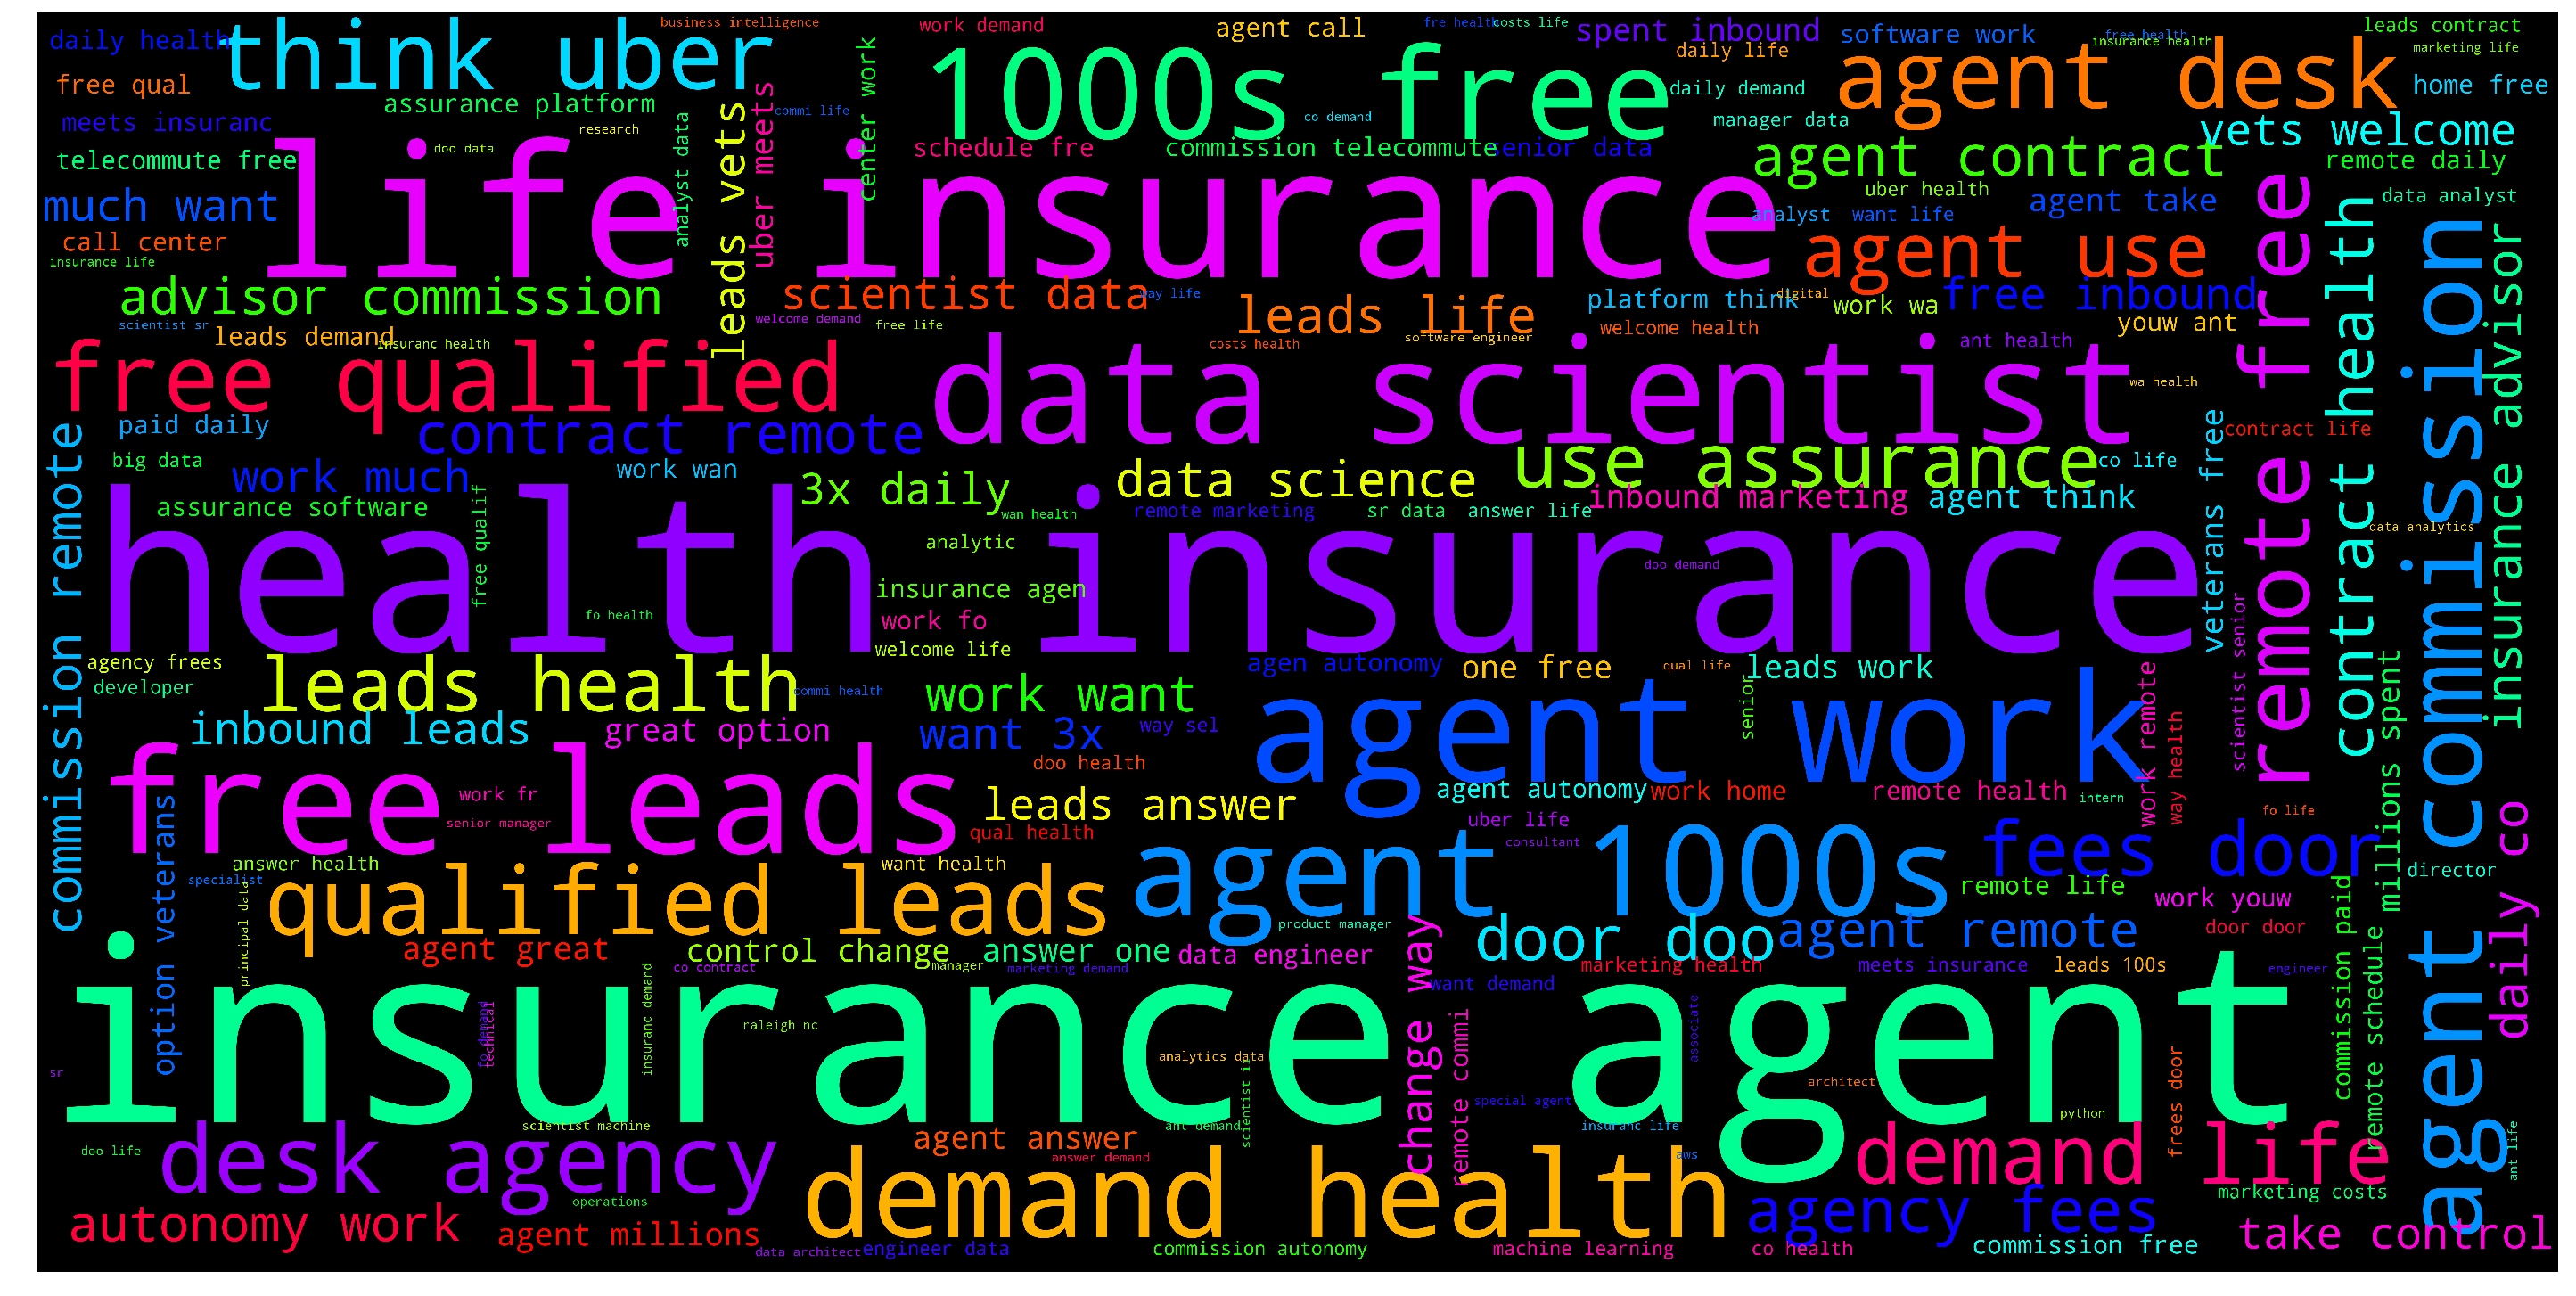

In [433]:
# Get cluster_0 data
data_cluster_0 = df[df['labels']==0]
# Get stopwords
comment_words_cluster_0 = get_comment_words(data_cluster_0)
# Plot cluster_0 Cloud
make_cloud(comment_words_cluster_0,.42)

# Plot the word cloud for cluster 1

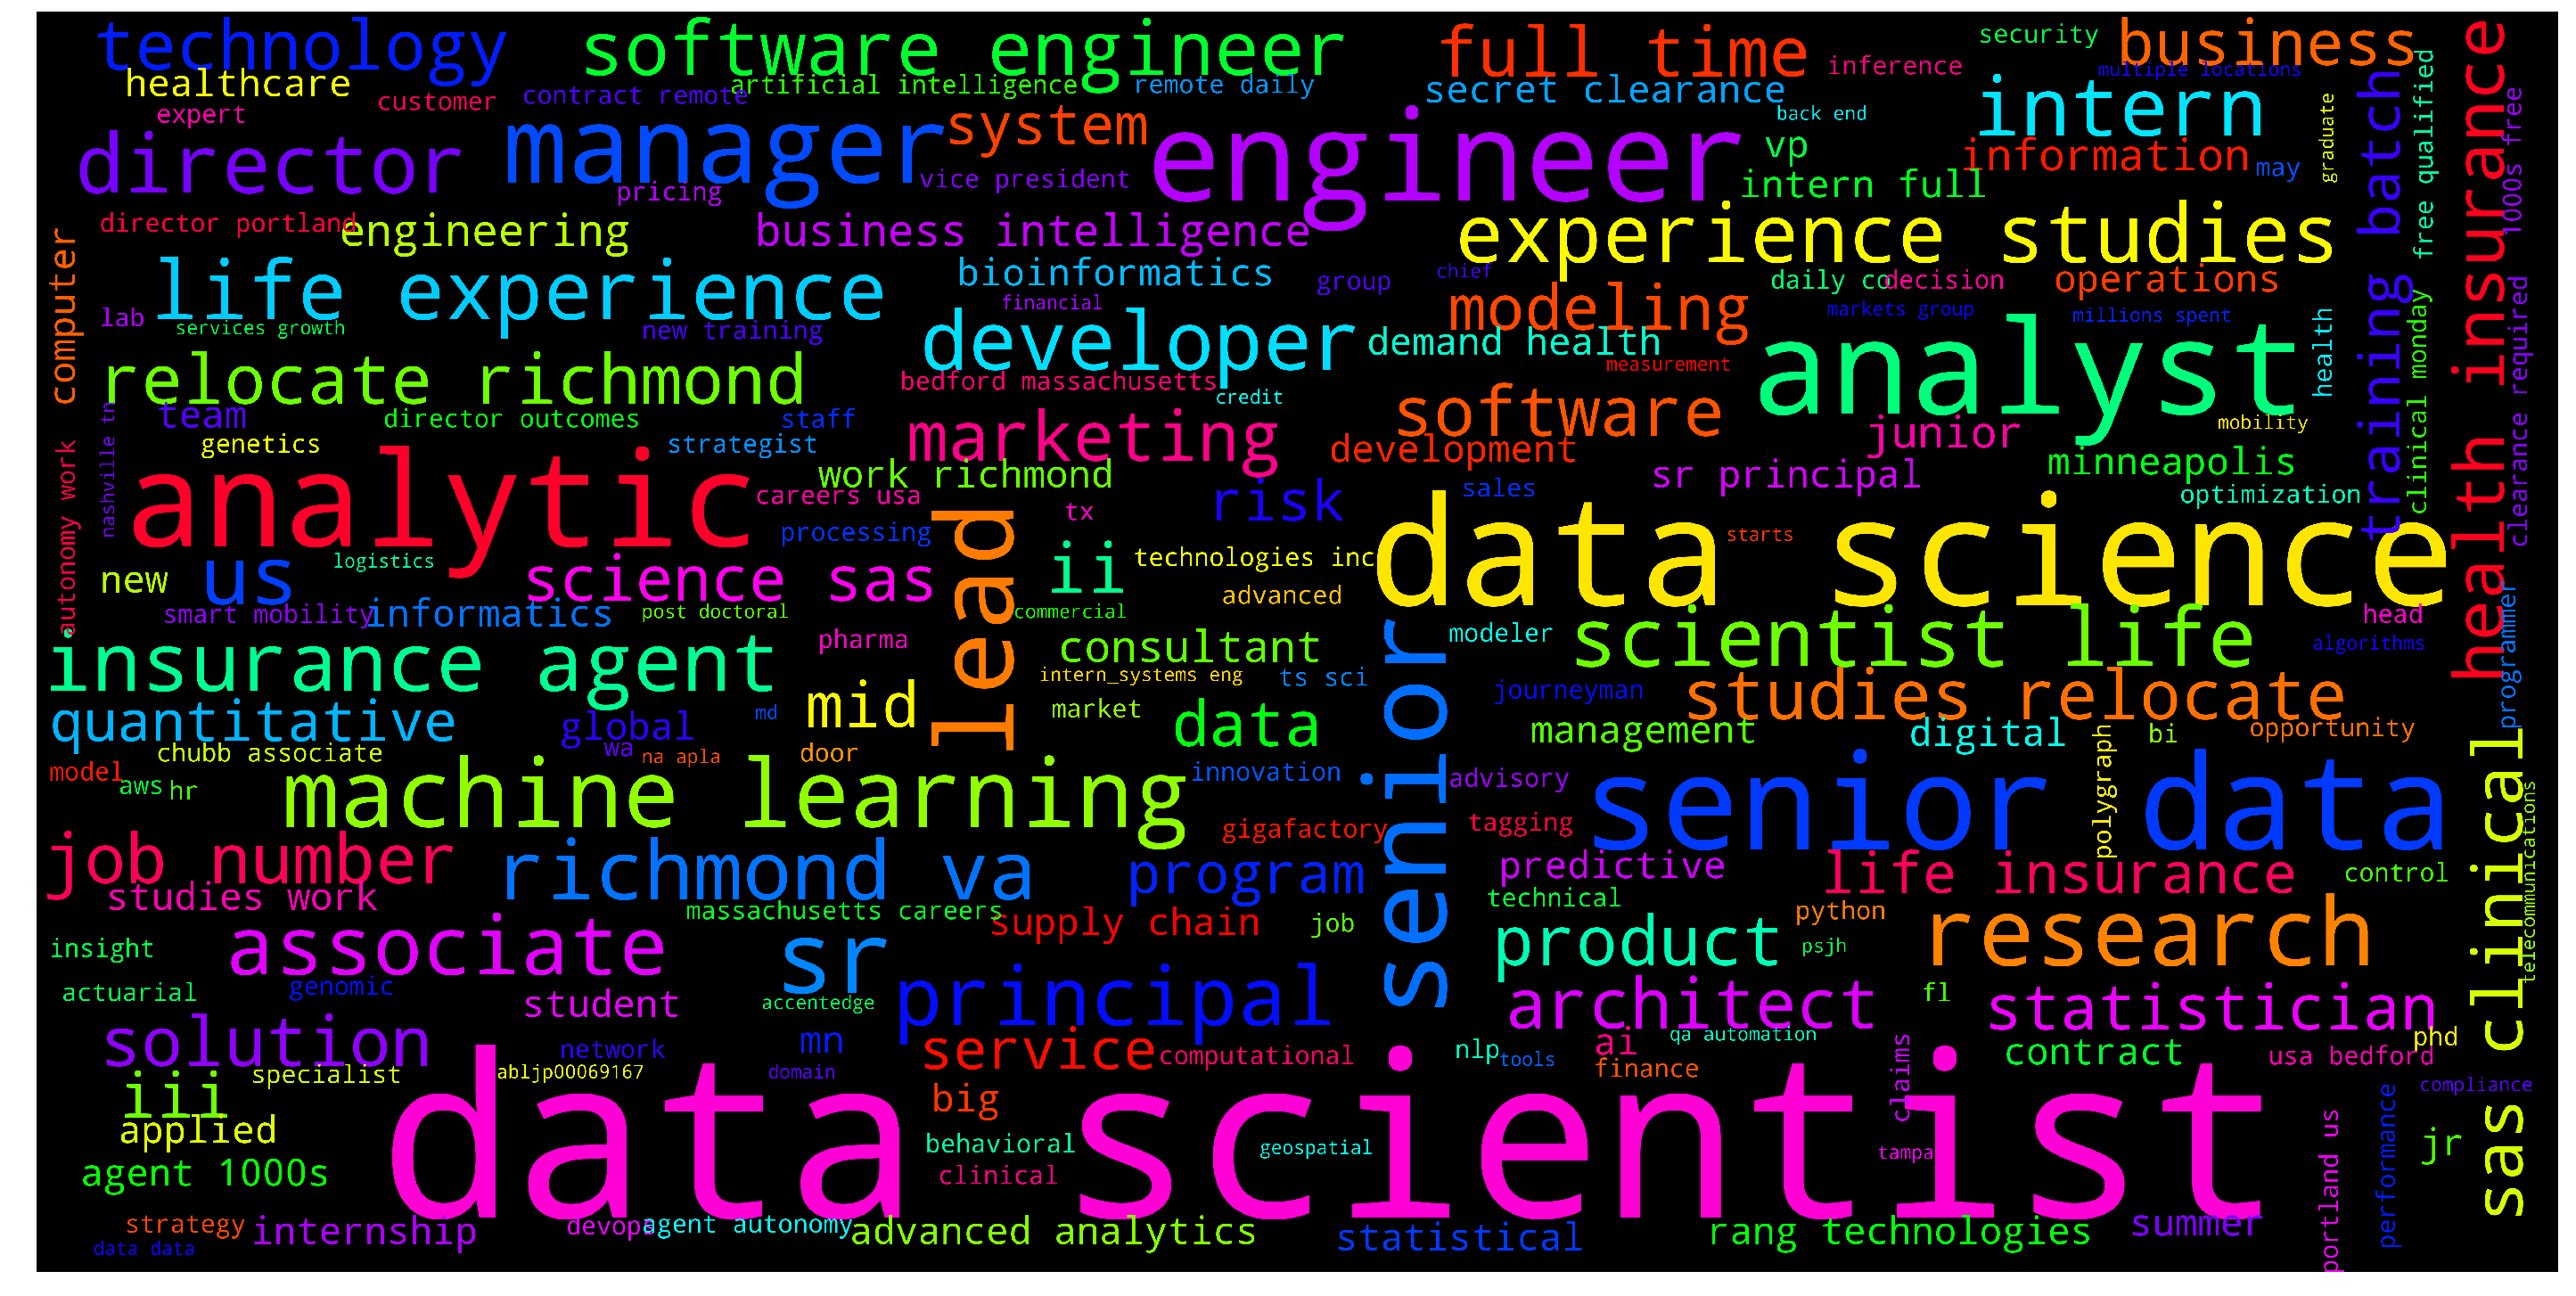

In [434]:
# Get cluster_1 data
data_cluster_1 = data[data['labels']==1]
# Get stopwords
comment_words_cluster_1 = get_comment_words(data_cluster_1)
# Plot cluster_1 Cloud
make_cloud(comment_words_cluster_1,.42)

# Plot the word cloud for cluster 2

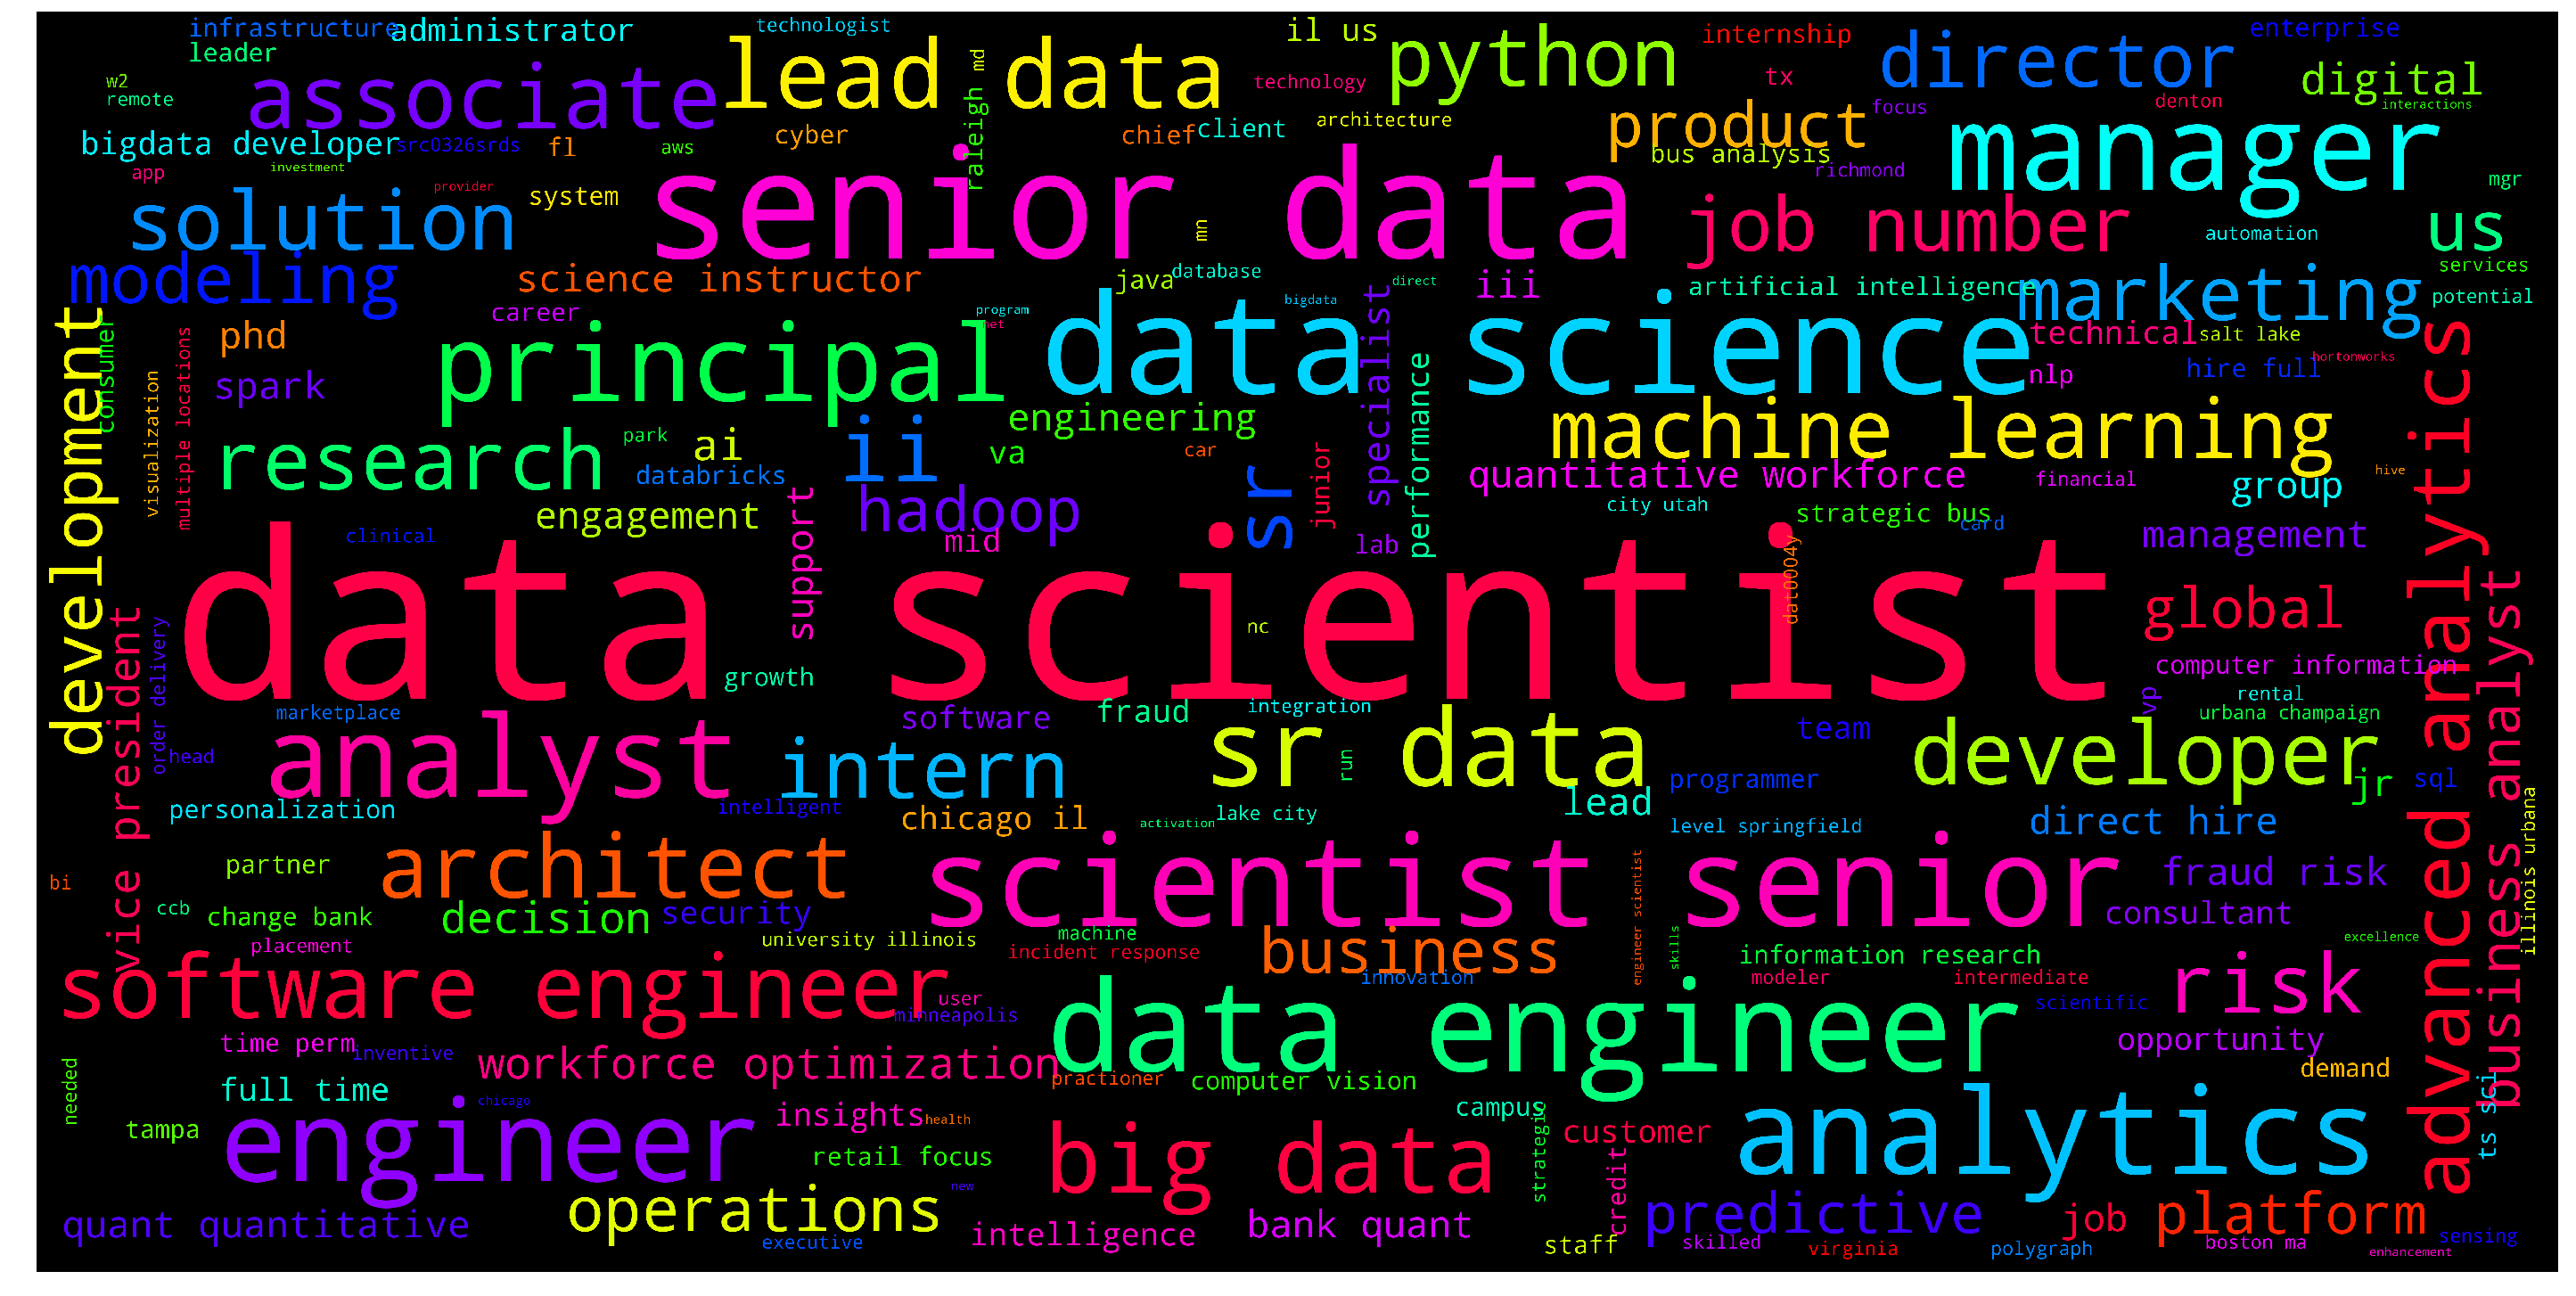

In [435]:
# Get cluster_2 data
data_cluster_2 = data[data['labels']==2]
# Get stopwords
comment_words_cluster_2 = get_comment_words(data_cluster_2)
# Plot cluster_1 Cloud
make_cloud(comment_words_cluster_2,.42)

# Plot the Skill Histograms for the k-modes clusters

In [436]:
df[non_zero_skills_and_label].groupby('labels').mean().T[0].sort_values(ascending=False)#.sort_values(ascending=False))


sql           0.044501
excel         0.022882
tableau       0.016056
python        0.013401
sas           0.012642
java          0.011504
hadoop        0.009861
oracle        0.008344
c             0.008344
r             0.007838
nosql         0.006574
spark         0.005689
azure         0.004678
javascript    0.004425
tensorflow    0.003793
unix          0.003413
mysql         0.003287
hive          0.003287
c++           0.003161
amazon        0.002908
c#            0.002781
teradata      0.002781
keras         0.002402
alteryx       0.002402
matlab        0.002149
scala         0.002149
pytorch       0.001896
mongodb       0.001896
hbase         0.001643
perl          0.001643
git           0.001643
mapreduce     0.001517
kafka         0.001517
spss          0.001517
cassandra     0.001391
postgresql    0.001138
hdfs          0.001011
weka          0.000759
stata         0.000759
d3            0.000632
ruby          0.000632
pig           0.000506
jupyter       0.000379
Name: 0, dt

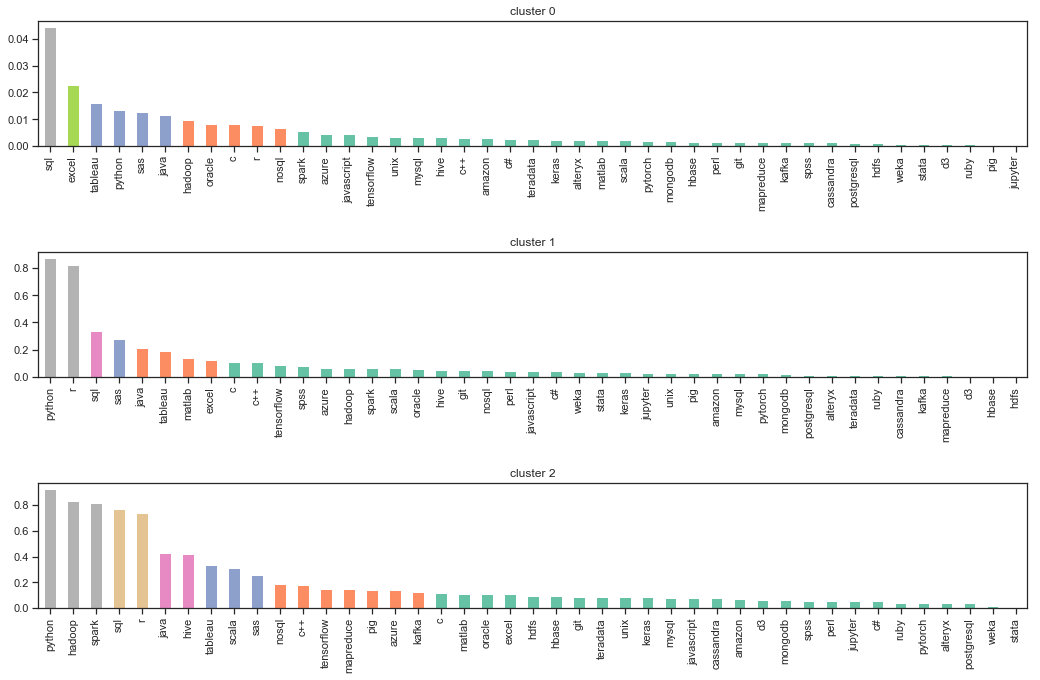

In [437]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(15,10))
mpl.rcParams['font.size']=25
mpl.rcParams.update()

df[non_zero_skills_and_label].groupby('labels').mean().T[0].sort_values(ascending=False).plot(ax = ax[0],kind='bar',color=get_colors(df[non_zero_skills_and_label].groupby('labels').mean().T[0].sort_values(ascending=False)))
ax[0].set_title('cluster 0')
df[non_zero_skills_and_label].groupby('labels').mean().T[1].sort_values(ascending=False).plot(ax = ax[1],kind='bar',color=get_colors(df[non_zero_skills_and_label].groupby('labels').mean().T[1].sort_values(ascending=False)))
ax[1].set_title('cluster 1')
df[non_zero_skills_and_label].groupby('labels').mean().T[2].sort_values(ascending=False).plot(ax = ax[2],kind='bar',color=get_colors(df[non_zero_skills_and_label].groupby('labels').mean().T[2].sort_values(ascending=False)))
ax[2].set_title('cluster 2')

plt.tight_layout()
plt.show()

# Get the K-modes Clusters for the standardized, binned, means

In [249]:
data_km = standardized_data_just_nonzero_prob_skills_metric[['r','spark','sas']]
km = KModes(n_clusters=5, init='Huang', n_init=100, verbose=1)
clusters = km.fit_predict(data_km)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21, cost: 175.0
Run 1, iteration: 2/100, moves: 0, cost: 175.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 25, cost: 172.0
Run 2, iteration: 2/100, moves: 0, cost: 172.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 28, cost: 186.0
Run 3, iteration: 2/100, moves: 0, cost: 186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 15, cost: 183.0
Run 4, iteration: 2/100, moves: 0, cost: 183.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 14, cost: 191.0
Run 5, iteration: 2/100, moves: 0, cost: 191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 18, cost: 181

Run 47, iteration: 1/100, moves: 10, cost: 183.0
Run 47, iteration: 2/100, moves: 1, cost: 183.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 48, iteration: 1/100, moves: 17, cost: 181.0
Run 48, iteration: 2/100, moves: 0, cost: 181.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 49, iteration: 1/100, moves: 27, cost: 179.0
Run 49, iteration: 2/100, moves: 2, cost: 179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 50, iteration: 1/100, moves: 16, cost: 179.0
Run 50, iteration: 2/100, moves: 1, cost: 179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 51, iteration: 1/100, moves: 15, cost: 183.0
Run 51, iteration: 2/100, moves: 0, cost: 183.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 52, iteration: 1/100, moves: 23, cost: 184.0
Run 52, iteration: 2/100, moves: 0, cost: 184.0
Init: initializing

Init: initializing clusters
Starting iterations...
Run 96, iteration: 1/100, moves: 11, cost: 176.0
Run 96, iteration: 2/100, moves: 0, cost: 176.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 97, iteration: 1/100, moves: 12, cost: 177.0
Run 97, iteration: 2/100, moves: 0, cost: 177.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 98, iteration: 1/100, moves: 20, cost: 179.0
Run 98, iteration: 2/100, moves: 0, cost: 179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 99, iteration: 1/100, moves: 9, cost: 176.0
Run 99, iteration: 2/100, moves: 0, cost: 176.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 100, iteration: 1/100, moves: 5, cost: 190.0
Run 100, iteration: 2/100, moves: 2, cost: 190.0
Best run was number 83


In [250]:
df = []
df = standardized_data_just_nonzero_prob_skills_metric
df['labels'] = [str(x) for x in km.labels_]

# Plot the k-modes Pair Plots

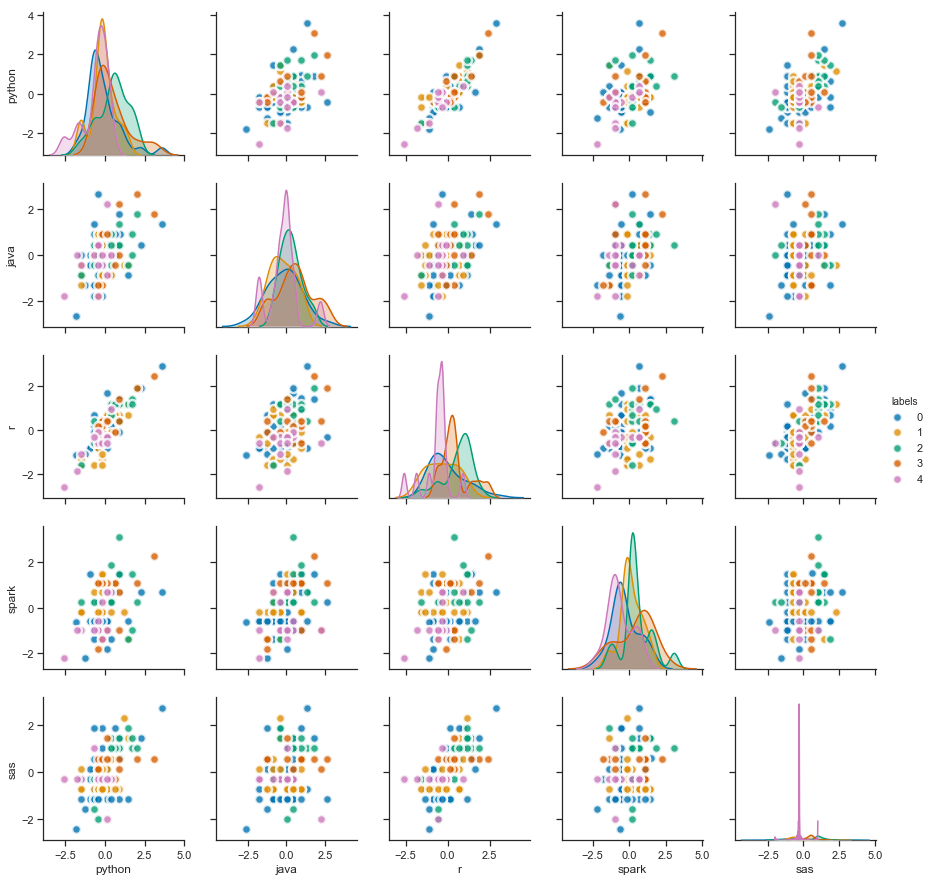

In [251]:
sns.pairplot(df,vars= ['python','java','r','spark','sas'],
             hue='labels',
             palette='colorblind',
             # Edit the scatter point attributes
            plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, alpha=0.8))

mpl.rcParams['font.size'] = 15
mpl.rcParams.update()